In [17]:
import pandas as pd
import numpy as np
import pickle, IPython,soundfile, librosa
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
# rawDf = pd.read_csv('./results_re_new.csv')
with open('./results_re_new_20221214.pickle','br') as f : 
    rawDf = pickle.load(f)
rawDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116761 entries, 0 to 116760
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fileName     116761 non-null  object 
 1   recon_error  116761 non-null  float32
 2   t_v          116761 non-null  object 
 3   lv           116761 non-null  object 
dtypes: float32(1), object(3)
memory usage: 3.1+ MB


In [19]:
labels = pd.read_csv('sound_labeling_1s.csv')
labels.columns = ['fileName', 'isInfected']
labels.isInfected.value_counts()

0    6224
1     616
Name: isInfected, dtype: int64

In [20]:
rawDf.fileName.iloc[-1]
labels.fileName.iloc[-1]

'FA0004_GW01_H01_0203_20211109020145_farm_mic_snd_ecf0feec424e_58.jpg'

'FA0004_GW01_H01_0203_20211117081644_farm_mic_snd_50cbcc6d48e7_59.jpg'

In [21]:
rawDf = pd.merge(rawDf,labels,how="left", left_on='fileName', right_on = 'fileName')
rawDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116761 entries, 0 to 116760
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fileName     116761 non-null  object 
 1   recon_error  116761 non-null  float32
 2   t_v          116761 non-null  object 
 3   lv           116761 non-null  object 
 4   isInfected   4366 non-null    float64
dtypes: float32(1), float64(1), object(3)
memory usage: 4.9+ MB


In [22]:
rawDf.isnull().sum()

rawDf.isInfected.fillna(0, inplace=True)

rawDf.isnull().sum()

fileName            0
recon_error         0
t_v                 0
lv                  0
isInfected     112395
dtype: int64

fileName       0
recon_error    0
t_v            0
lv             0
isInfected     0
dtype: int64

In [23]:
rawDf['createTime'] = [x.split('_')[4] for x in rawDf.fileName]
rawDf['createTime'] = pd.to_datetime(rawDf.createTime)
rawDf

fileName  recon_error  \
0       FA0004_GW01_H01_0202_20211108000647_farm_mic_s...    85.645699   
1       FA0004_GW01_H01_0202_20211108000647_farm_mic_s...    81.154343   
2       FA0004_GW01_H01_0202_20211108000647_farm_mic_s...    82.044327   
3       FA0004_GW01_H01_0202_20211108000647_farm_mic_s...    71.485146   
4       FA0004_GW01_H01_0202_20211108000647_farm_mic_s...    85.938614   
...                                                   ...          ...   
116756  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...    85.317444   
116757  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...    78.097450   
116758  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...    78.112968   
116759  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...    81.750496   
116760  FA0004_GW01_H01_0203_20211109020145_farm_mic_s...    75.742050   

                                                      t_v  \
0       [[-0.8524038, 0.14019267, 0.34800395, 0.3642073]]   
1       [[-0.85236317, 0.13996583, 0.3480842, 0.3643131]]   
2       [[-0.85236794, 0.13999215, 0.34807685, 0.36429...   
3       [[-0.8522888, 0.13955297, 0.34822354, 0.364512...   
4       [[-0.85240895, 0.14022088, 0.34799436, 0.36419...   
...                                                   ...   
116756  [[-0.8523941, 0.14013827, 0.3480244, 0.36423147]]   
116757  [[-0.8523354, 0.13981196, 0.3481371, 0.36438647]]   
116758    [[-0.852346, 0.13987051, 0.3481145, 0.3643609]]   
116759  [[-0.852371, 0.14000961, 0.34806722, 0.36429414]]   
116760  [[-0.8523223, 0.13973923, 0.34815902, 0.364424...   

                                                       lv  isInfected  \
0       [0.40855324, 0.46510977, 0.7097476, 0.56814486...         0.0   
1       [0.27788466, 0.36511216, 0.42506468, 0.5379058...         0.0   
2       [0.56922, 0.35463578, 0.6267819, 0.30983818, 0...         0.0   
3       [0.39463955, 0.67393446, 0.39146224, 0.3753995...         0.0   
4       [0.50063163, 0.7099569, 0.5955185, 0.46173003,...         0.0   
...                                                   ...         ...   
116756  [0.5542677, 0.37186828, 0.69437337, 0.4911889,...         0.0   
116757  [0.4613635, 0.5663579, 0.586307, 0.29702696, 0...         0.0   
116758  [0.48533726, 0.49098775, 0.5524972, 0.5217262,...         0.0   
116759  [0.6445537, 0.35710874, 0.5255267, 0.5389953, ...         0.0   
116760  [0.469523, 0.58820707, 0.43170348, 0.5032214, ...         0.0   

                createTime  
0      2021-11-08 00:06:47  
1      2021-11-08 00:06:47  
2      2021-11-08 00:06:47  
3      2021-11-08 00:06:47  
4      2021-11-08 00:06:47  
...                    ...  
116756 2021-11-09 02:01:45  
116757 2021-11-09 02:01:45  
116758 2021-11-09 02:01:45  
116759 2021-11-09 02:01:45  
116760 2021-11-09 02:01:45  

[116761 rows x 6 columns]

## plot by recon_error

<Figure size 1000x700 with 0 Axes>

abnormal : 341


<AxesSubplot: xlabel='recon_error', ylabel='Count'>

Text(0.5, 1.0, 'abnormal')

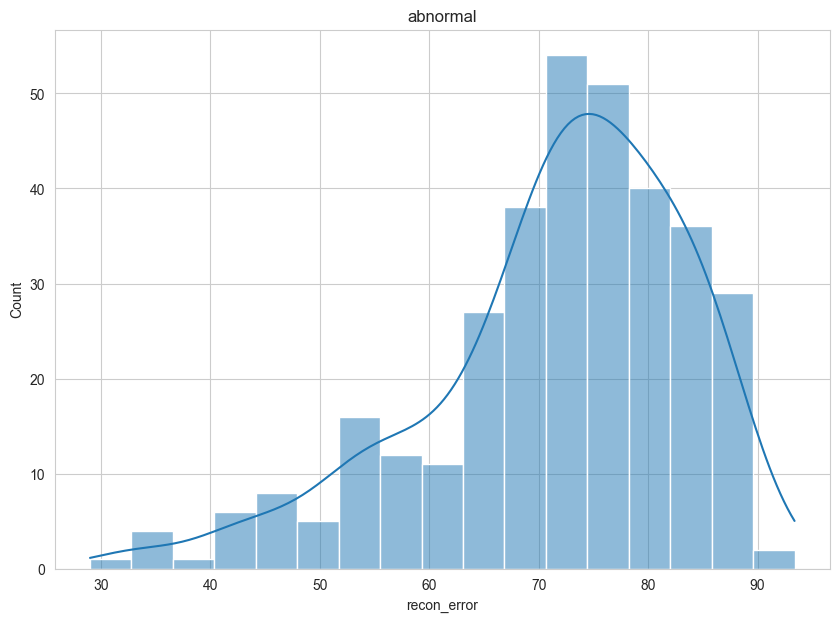

<Figure size 1000x700 with 0 Axes>

normal : 116420


<AxesSubplot: xlabel='recon_error', ylabel='Count'>

Text(0.5, 1.0, 'normal')

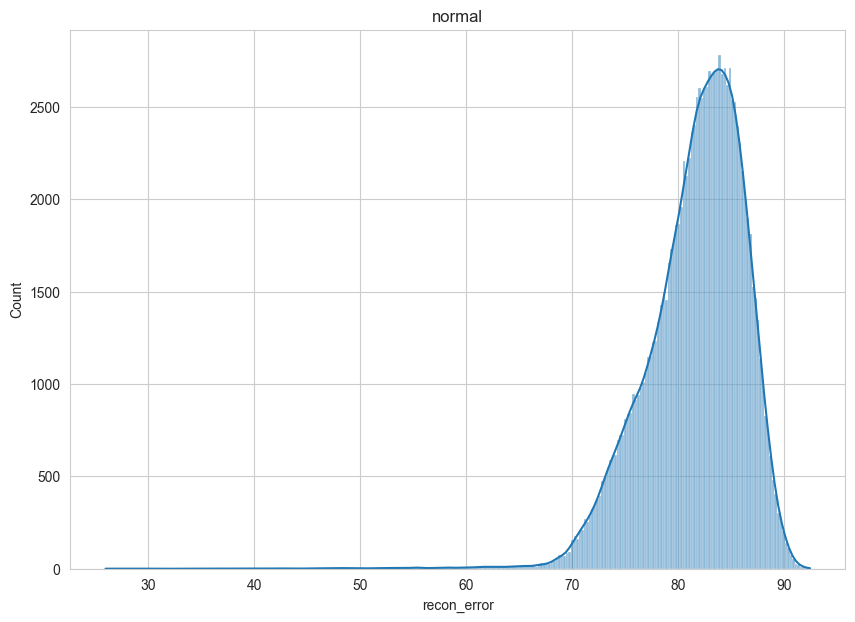

In [24]:

sns.set_style('whitegrid')

plt.figure(figsize=(10,7))
print(f"abnormal : {len(rawDf[rawDf.isInfected == 1.0]['recon_error'])}")
sns.histplot(data=rawDf[rawDf.isInfected == 1.0]['recon_error'], kde=True)
plt.title("abnormal")
plt.show()

plt.figure(figsize=(10,7))
print(f"normal : {len(rawDf[rawDf.isInfected == 0.0]['recon_error'])}")
sns.histplot(data=rawDf[rawDf.isInfected == 0.0]['recon_error'], kde=True)
plt.title("normal")
plt.show()



count :             fileName  recon_error     t_v      lv  createTime
isInfected                                                   
0.0           116420       116420  116420  116420      116420
1.0              341          341     341     341         341


<Figure size 1000x700 with 0 Axes>

<AxesSubplot: xlabel='createTime', ylabel='recon_error'>

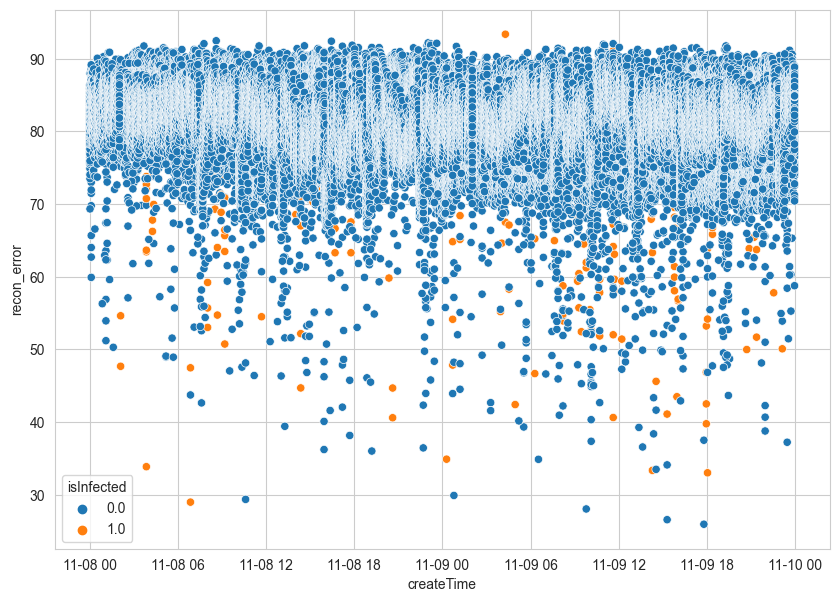

<Figure size 1000x700 with 0 Axes>

<AxesSubplot: xlabel='createTime', ylabel='recon_error'>

Text(0.5, 1.0, 'inFected')

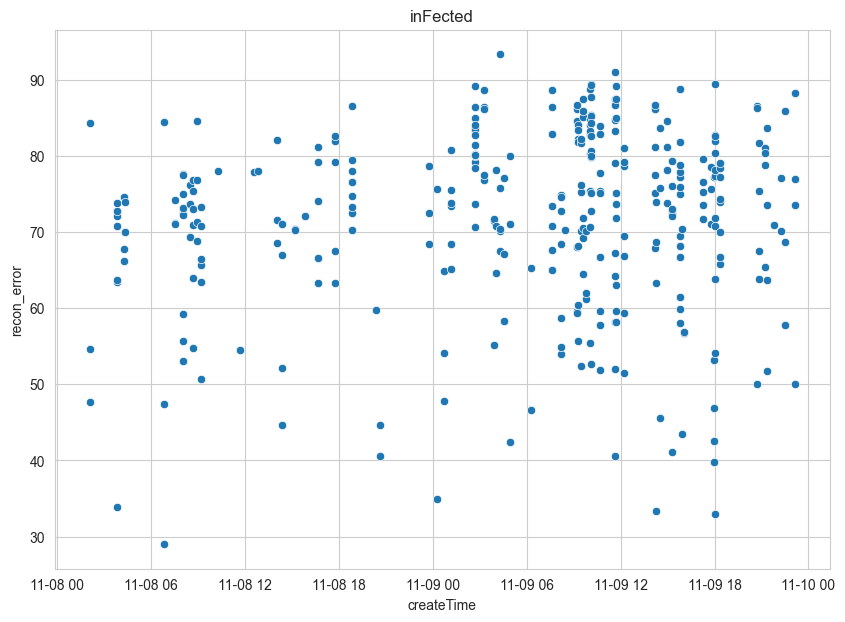

In [36]:
sns.set_style('whitegrid')

plot_df = rawDf # [(rawDf.recon_error >= 10) & (rawDf.recon_error< 45)]
print(f"count : {plot_df.groupby('isInfected').agg('count')}")
plt.figure(figsize=(10,7))
sns.scatterplot(data=plot_df, x='createTime', y='recon_error', hue='isInfected')
plt.show()

plt.figure(figsize=(10,7))
sns.scatterplot(data=plot_df[plot_df.isInfected == 1.0], x='createTime', y='recon_error')
plt.title("inFected")
plt.show()


In [13]:
fileListAllStrage = rawDf[(rawDf.recon_error > 20.)]['fileName'].to_list()
print(f"{len(fileListAllStrage)}/{len(rawDf)}")

116761/116761


### image normal 

8

FA0004_GW01_H01_0200_20211108103644_farm_mic_snd_c1d6d1d2498a_03.jpg : [29.367592]


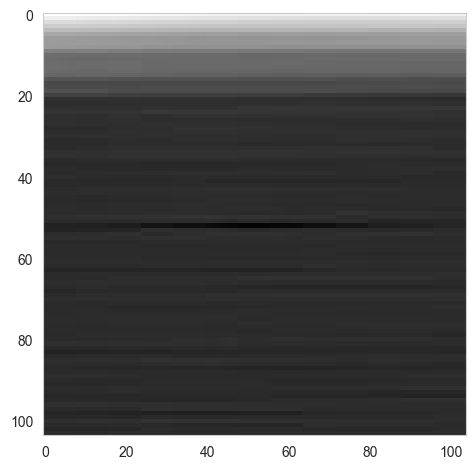

FA0004_GW01_H01_0201_20211108073647_farm_mic_snd_f97ebf7a4bf4_13.jpg : [42.644314]


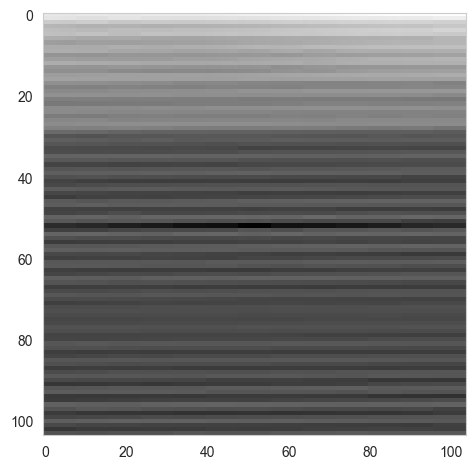

FA0004_GW01_H01_0201_20211108225203_farm_mic_snd_e7d8069d4d82_43.jpg : [43.949207]


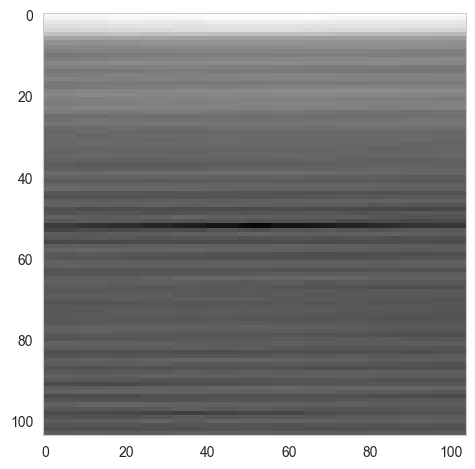

FA0004_GW01_H01_0200_20211109081146_farm_mic_snd_1d2944ed4c8e_34.jpg : [42.22793]


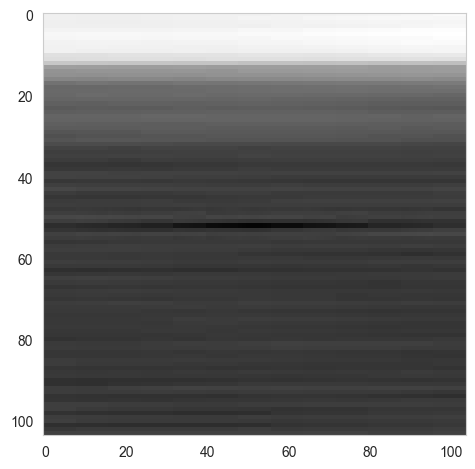

FA0004_GW01_H01_0200_20211109100649_farm_mic_snd_415ea7ae4c49_06.jpg : [44.891293]


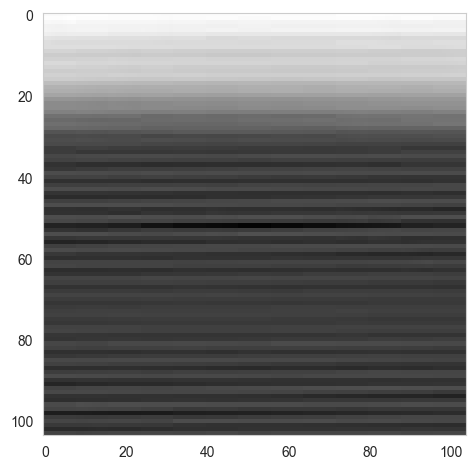

FA0004_GW01_H01_0200_20211109161147_farm_mic_snd_bdf3372b4179_06.jpg : [42.92444]


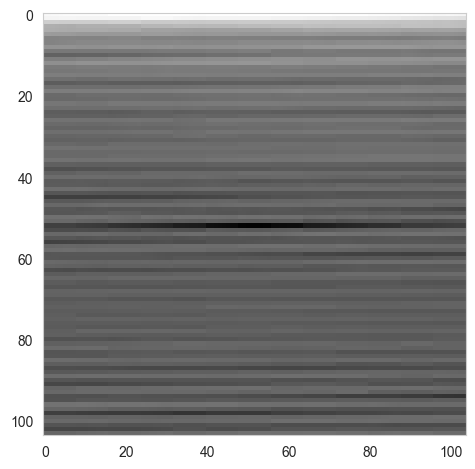

FA0004_GW01_H01_0201_20211109051150_farm_mic_snd_4db836d64999_20.jpg : [40.169266]


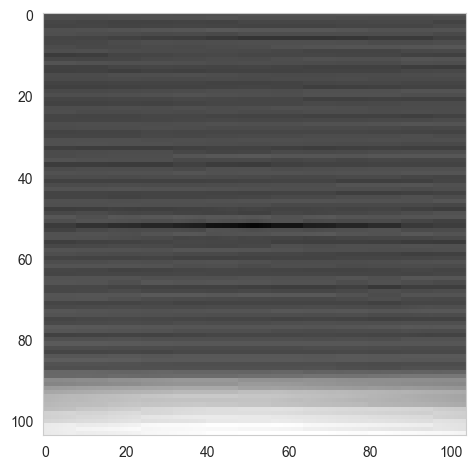

FA0004_GW01_H01_0201_20211109100649_farm_mic_snd_19a775fd48d8_03.jpg : [40.336563]


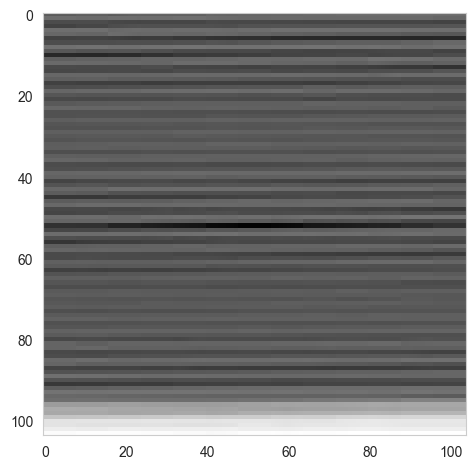

In [47]:
# normal
fileListnormal = rawDf[(rawDf.tsneClass == 1) & (rawDf.recon_error < 45.) & (rawDf.isInfected == 0.0) & (rawDf.fileName.str.contains('0200|0201'))]['fileName'].to_list()
len(fileListnormal)
for idx, aName in enumerate(fileListnormal) : 
    if idx > 50 : break
    # FA0004_GW01_H01_0200_20211108000646_farm_mic_snd_8641a0e94213_07.jpg
    subdir = aName.split('_')[4][:8]
    aFileName = '../output/ilt_20211108_20211109/normal/' + subdir + '/' + aName
    print(f"{aName} : {rawDf[rawDf.fileName == aName]['recon_error'].values}")
    aImg = plt.imread(aFileName)
    plt.imshow(aImg)
    # plt.axis('off')
    plt.grid(visible=False)
    plt.tight_layout()
    plt.show()

### image abnormal

253

FA0004_GW01_H01_0202_20211108020645_farm_mic_snd_dd483d8e4240_25.jpg : [84.281494]


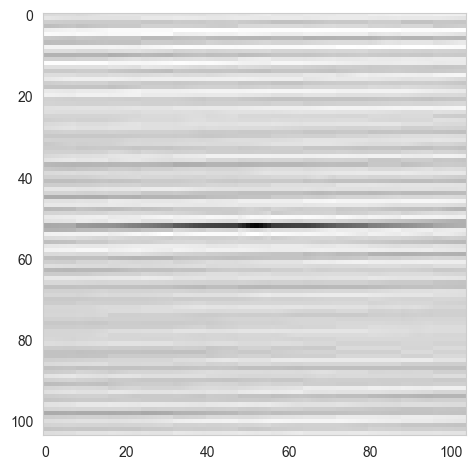

FA0004_GW01_H01_0202_20211108035145_farm_mic_snd_e13f81ad49ef_02.jpg : [63.43656]


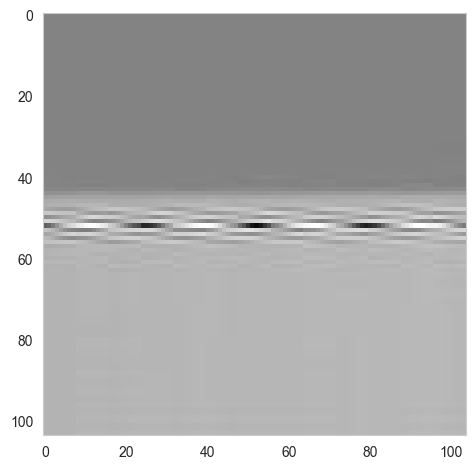

FA0004_GW01_H01_0202_20211108035145_farm_mic_snd_e13f81ad49ef_04.jpg : [72.12708]


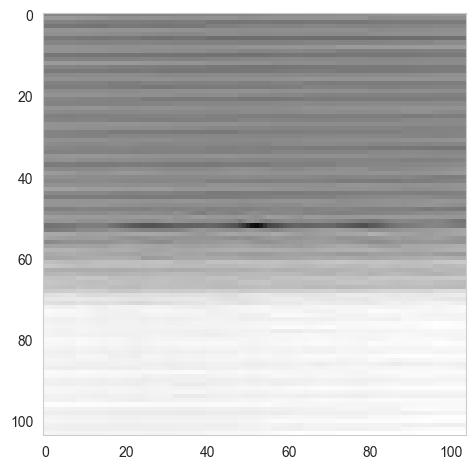

FA0004_GW01_H01_0202_20211108035145_farm_mic_snd_e13f81ad49ef_22.jpg : [72.72584]


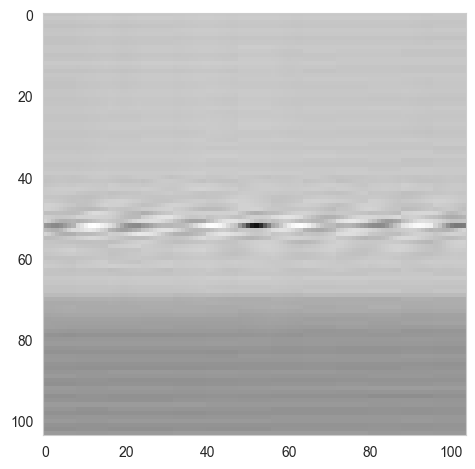

FA0004_GW01_H01_0202_20211108035145_farm_mic_snd_e13f81ad49ef_47.jpg : [70.754814]


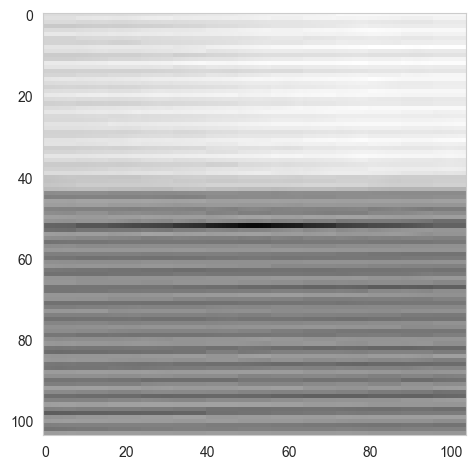

FA0004_GW01_H01_0202_20211108035145_farm_mic_snd_e13f81ad49ef_49.jpg : [73.79816]


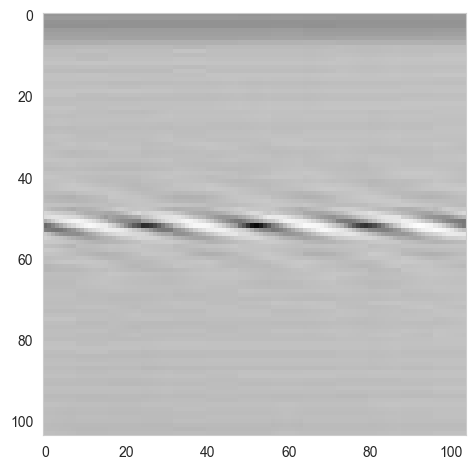

FA0004_GW01_H01_0202_20211108041643_farm_mic_snd_27bc75ef41e7_29.jpg : [74.61978]


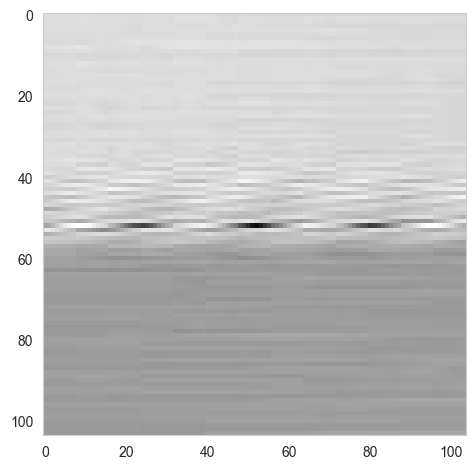

FA0004_GW01_H01_0202_20211108041643_farm_mic_snd_27bc75ef41e7_54.jpg : [66.247734]


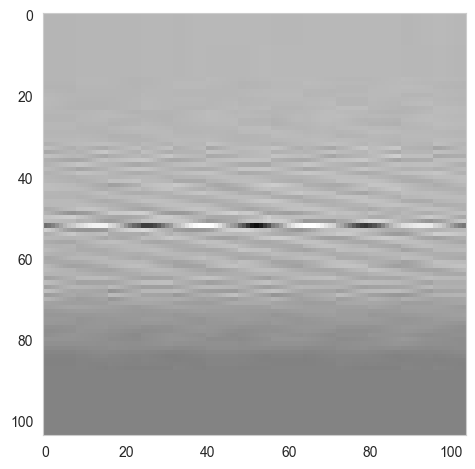

FA0004_GW01_H01_0202_20211108041643_farm_mic_snd_27bc75ef41e7_55.jpg : [67.803925]


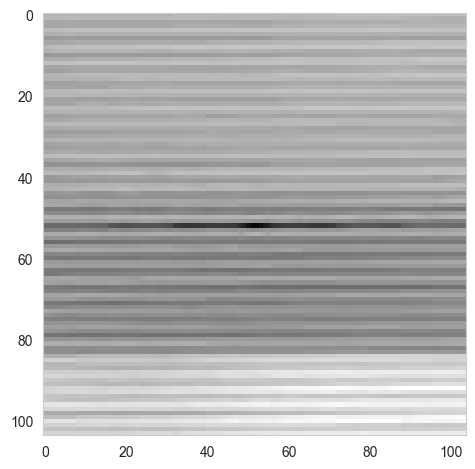

FA0004_GW01_H01_0202_20211108042146_farm_mic_snd_c7a25c584a92_02.jpg : [73.923195]


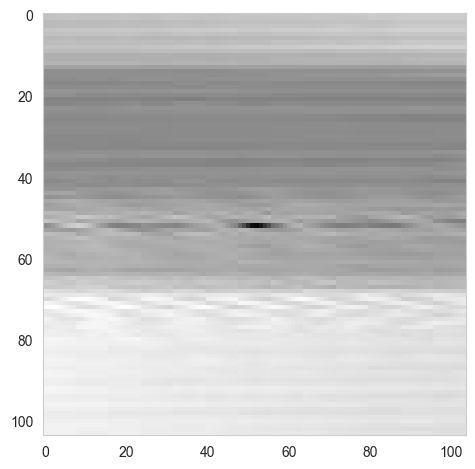

FA0004_GW01_H01_0202_20211108042146_farm_mic_snd_c7a25c584a92_25.jpg : [69.957855]


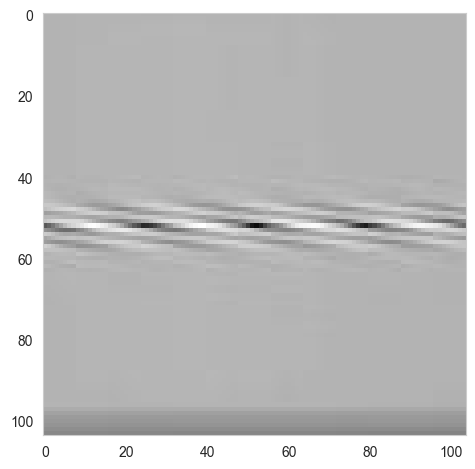

FA0004_GW01_H01_0202_20211108065144_farm_mic_snd_5473959d401d_19.jpg : [84.431915]


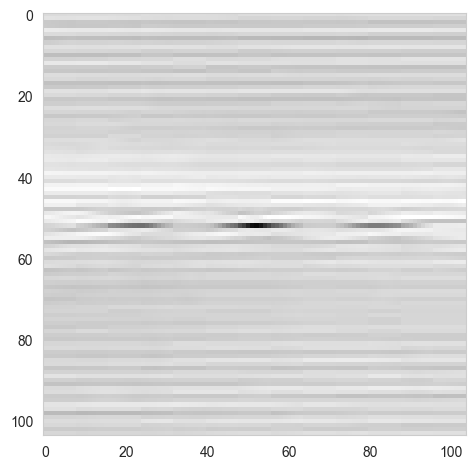

FA0004_GW01_H01_0202_20211108073143_farm_mic_snd_b1c43cd04cc0_08.jpg : [74.2825]


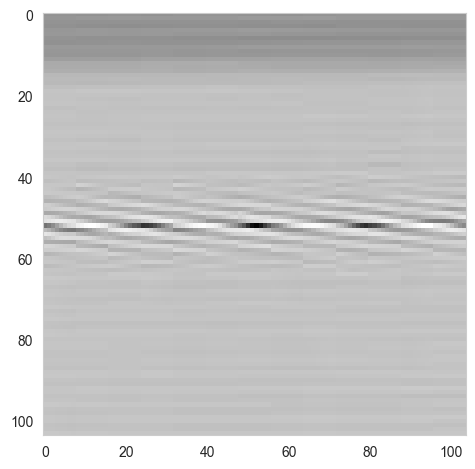

FA0004_GW01_H01_0202_20211108073143_farm_mic_snd_b1c43cd04cc0_10.jpg : [71.16914]


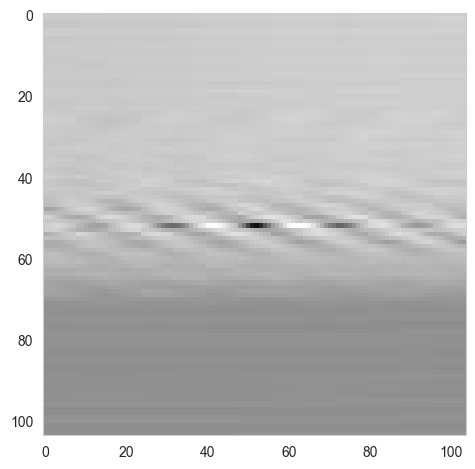

FA0004_GW01_H01_0202_20211108073143_farm_mic_snd_b1c43cd04cc0_36.jpg : [71.120575]


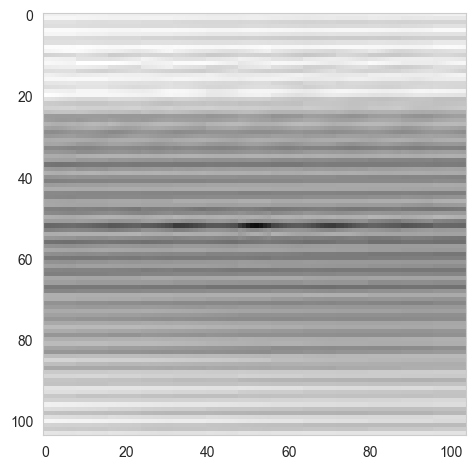

FA0004_GW01_H01_0202_20211108080145_farm_mic_snd_6426fdd34363_08.jpg : [72.49269]


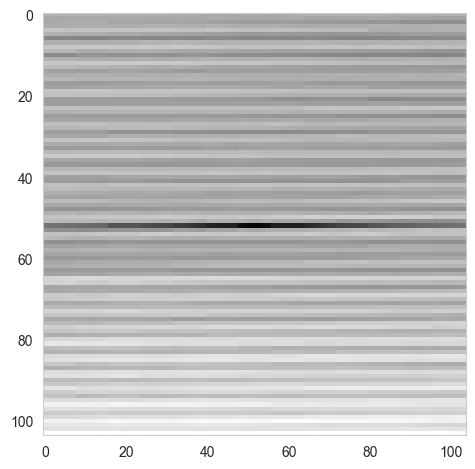

FA0004_GW01_H01_0202_20211108080145_farm_mic_snd_6426fdd34363_19.jpg : [72.282684]


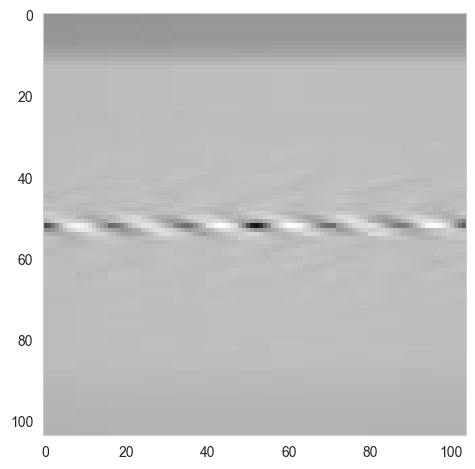

FA0004_GW01_H01_0202_20211108080145_farm_mic_snd_6426fdd34363_20.jpg : [77.69082]


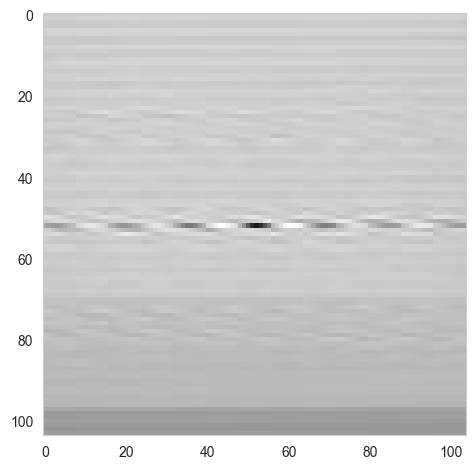

FA0004_GW01_H01_0202_20211108080145_farm_mic_snd_6426fdd34363_31.jpg : [73.11577]


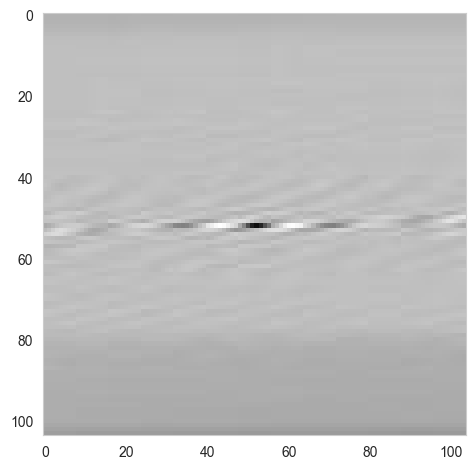

FA0004_GW01_H01_0202_20211108080145_farm_mic_snd_6426fdd34363_45.jpg : [77.531105]


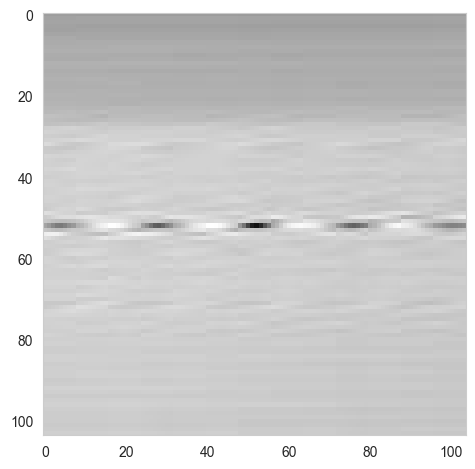

FA0004_GW01_H01_0202_20211108080145_farm_mic_snd_6426fdd34363_47.jpg : [75.04347]


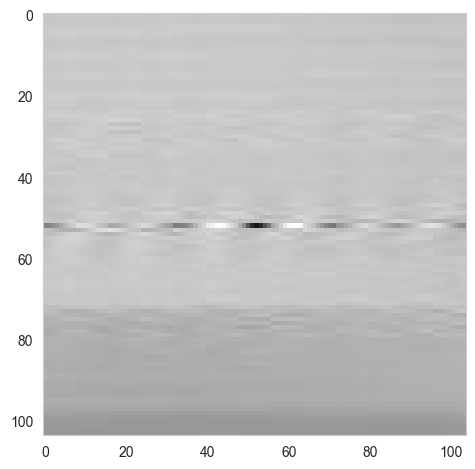

FA0004_GW01_H01_0202_20211108083145_farm_mic_snd_04253a954e88_27.jpg : [76.13537]


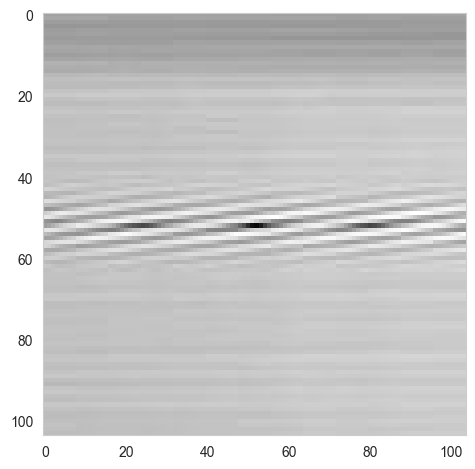

FA0004_GW01_H01_0202_20211108083145_farm_mic_snd_04253a954e88_44.jpg : [73.637085]


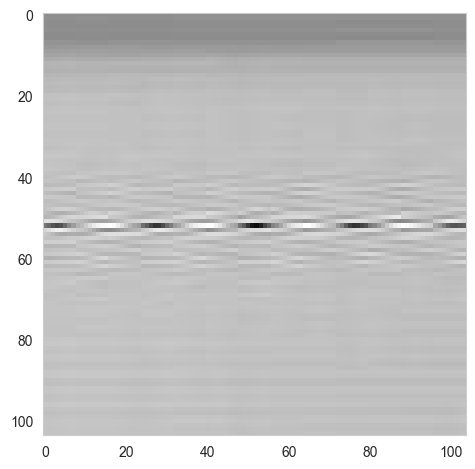

FA0004_GW01_H01_0202_20211108083145_farm_mic_snd_04253a954e88_54.jpg : [69.30818]


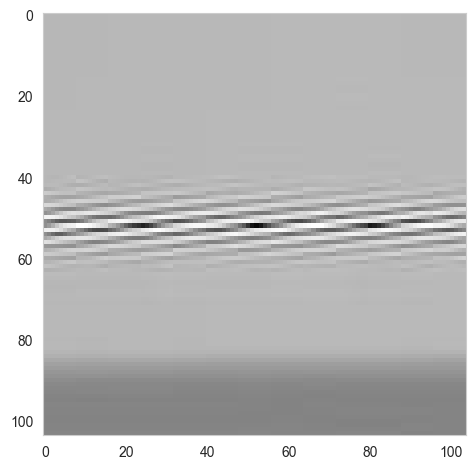

FA0004_GW01_H01_0202_20211108084144_farm_mic_snd_733c10ac4bd7_21.jpg : [76.82475]


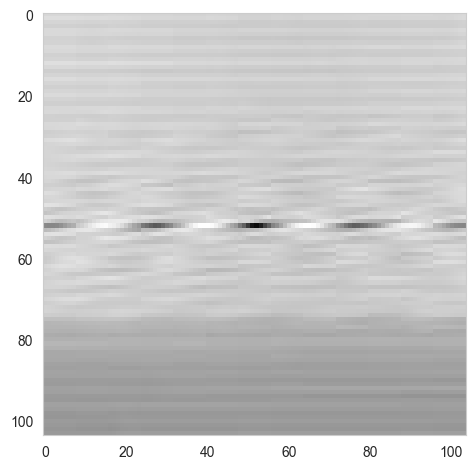

FA0004_GW01_H01_0202_20211108084144_farm_mic_snd_733c10ac4bd7_28.jpg : [75.37998]


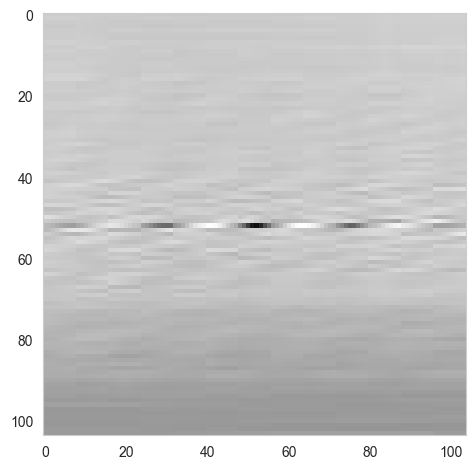

FA0004_GW01_H01_0202_20211108084144_farm_mic_snd_733c10ac4bd7_38.jpg : [70.89901]


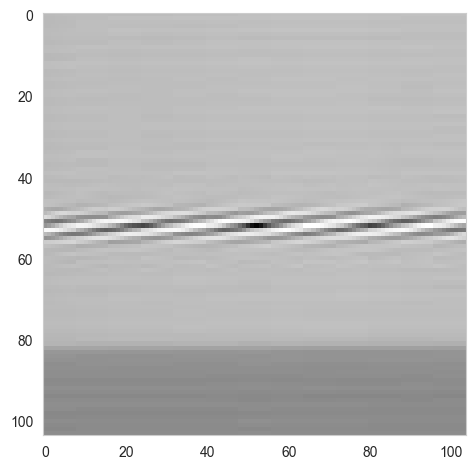

FA0004_GW01_H01_0202_20211108084144_farm_mic_snd_733c10ac4bd7_53.jpg : [73.07741]


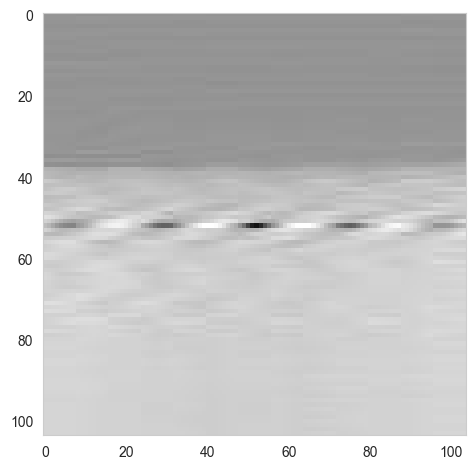

FA0004_GW01_H01_0202_20211108085644_farm_mic_snd_c0f28f0f452d_20.jpg : [84.63062]


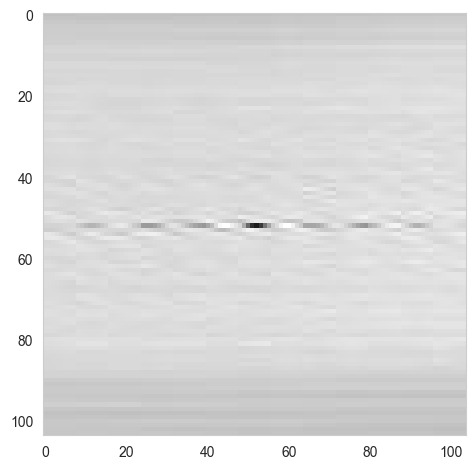

FA0004_GW01_H01_0202_20211108085644_farm_mic_snd_c0f28f0f452d_37.jpg : [76.9154]


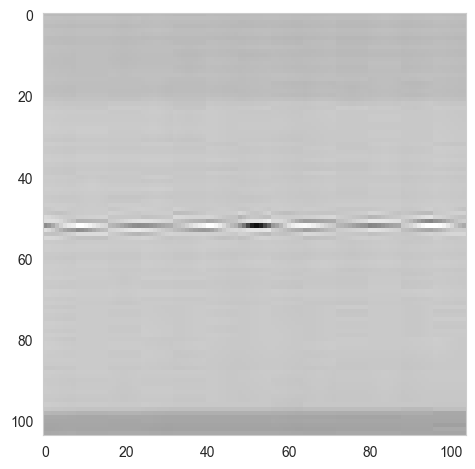

FA0004_GW01_H01_0202_20211108085644_farm_mic_snd_c0f28f0f452d_41.jpg : [71.30164]


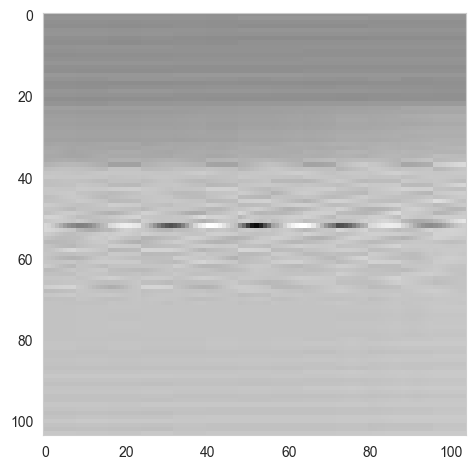

FA0004_GW01_H01_0202_20211108085644_farm_mic_snd_c0f28f0f452d_53.jpg : [68.87567]


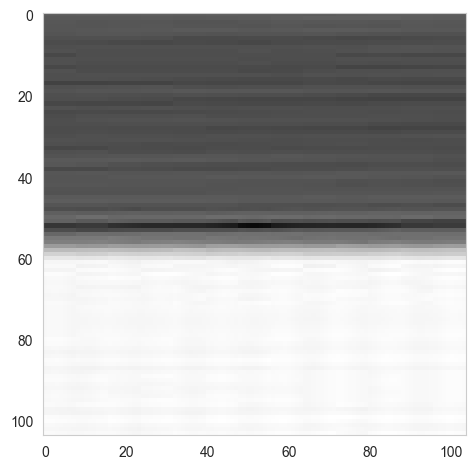

FA0004_GW01_H01_0202_20211108091144_farm_mic_snd_f7a3bcf049f0_01.jpg : [73.31739]


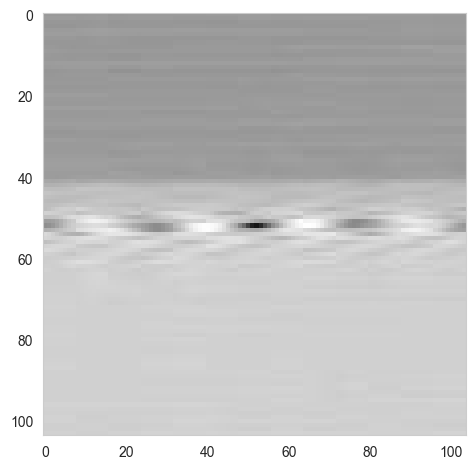

FA0004_GW01_H01_0202_20211108091144_farm_mic_snd_f7a3bcf049f0_13.jpg : [65.66537]


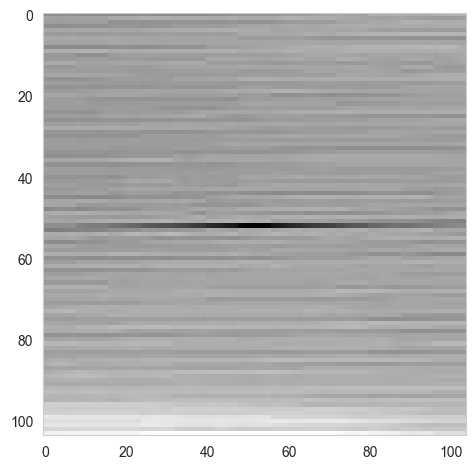

FA0004_GW01_H01_0202_20211108091144_farm_mic_snd_f7a3bcf049f0_19.jpg : [66.44483]


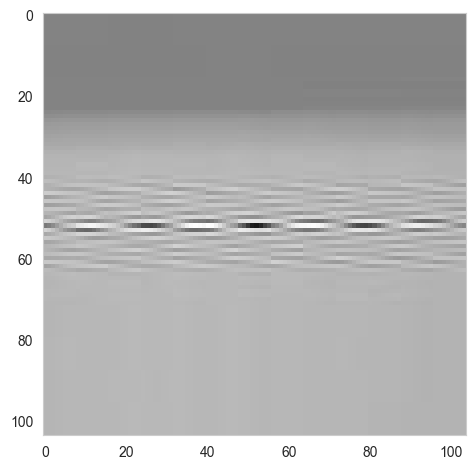

FA0004_GW01_H01_0202_20211108091144_farm_mic_snd_f7a3bcf049f0_45.jpg : [70.853516]


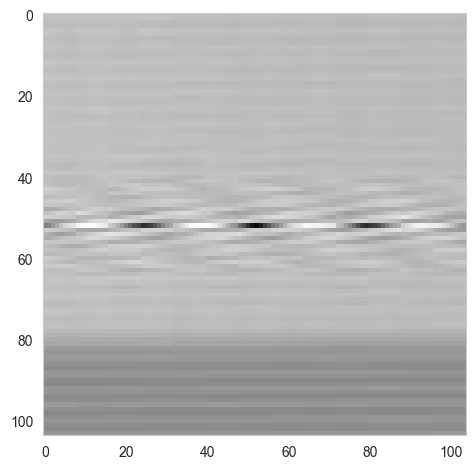

FA0004_GW01_H01_0202_20211108101644_farm_mic_snd_c5f6f16045c1_25.jpg : [78.03606]


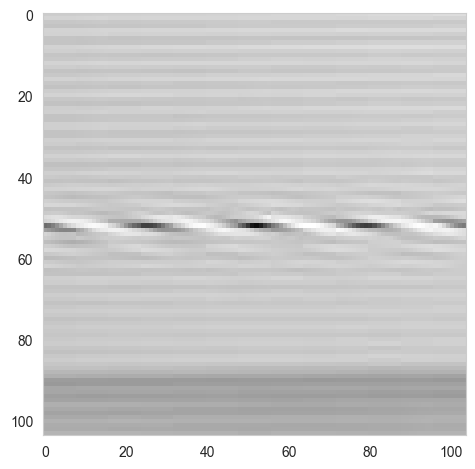

FA0004_GW01_H01_0202_20211108123645_farm_mic_snd_5b150ade4abd_01.jpg : [77.84028]


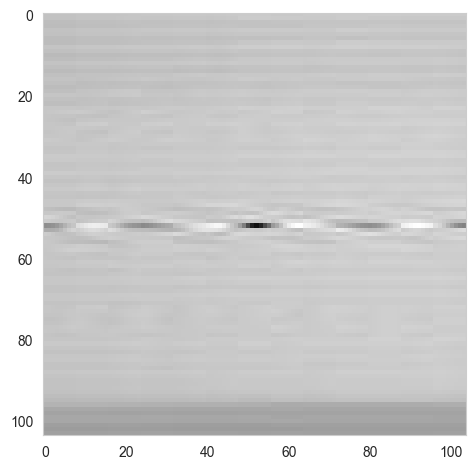

FA0004_GW01_H01_0202_20211108125145_farm_mic_snd_f3ad7c50499e_19.jpg : [78.066216]


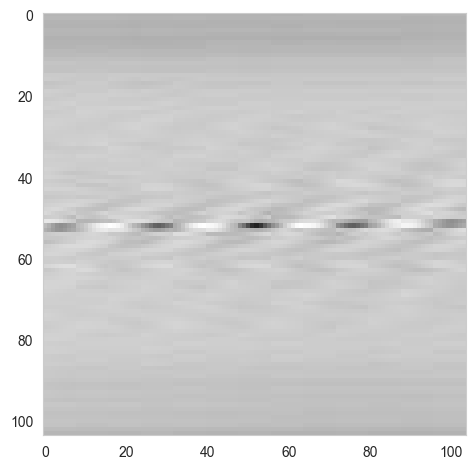

FA0004_GW01_H01_0202_20211108140144_farm_mic_snd_ec93221e43d7_02.jpg : [68.57499]


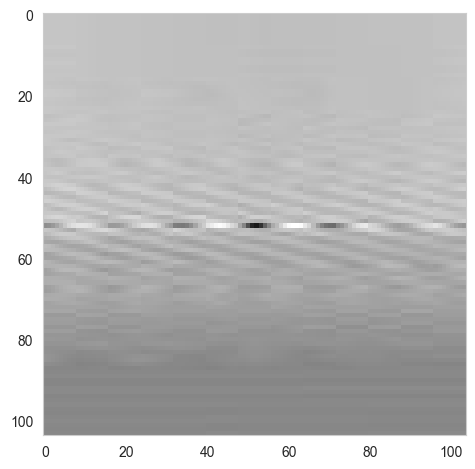

FA0004_GW01_H01_0202_20211108140144_farm_mic_snd_ec93221e43d7_39.jpg : [71.62392]


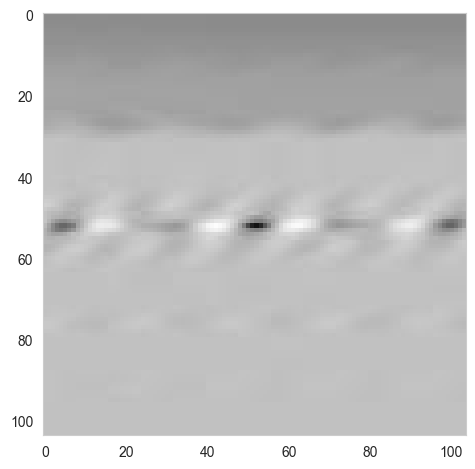

FA0004_GW01_H01_0202_20211108140144_farm_mic_snd_ec93221e43d7_40.jpg : [82.13248]


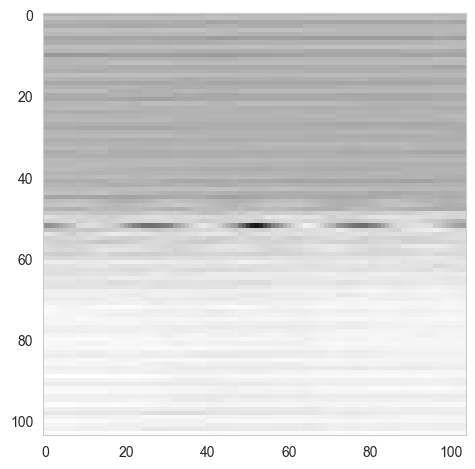

FA0004_GW01_H01_0202_20211108142145_farm_mic_snd_a263dc2048a5_31.jpg : [71.11191]


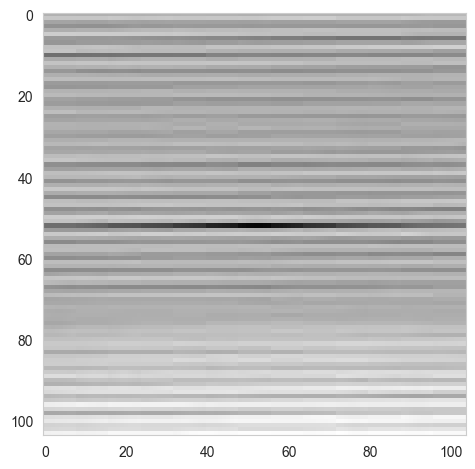

FA0004_GW01_H01_0202_20211108142145_farm_mic_snd_a263dc2048a5_52.jpg : [67.01333]


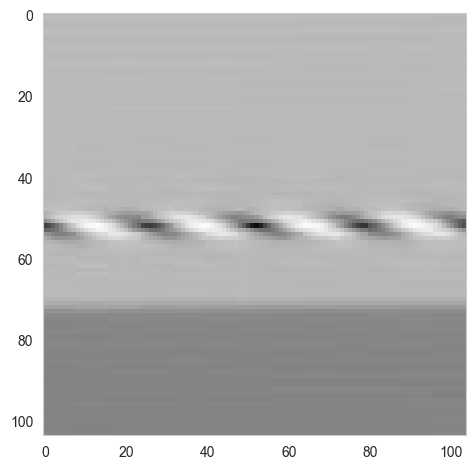

FA0004_GW01_H01_0202_20211108151145_farm_mic_snd_2d2e0a5543e5_27.jpg : [70.45862]


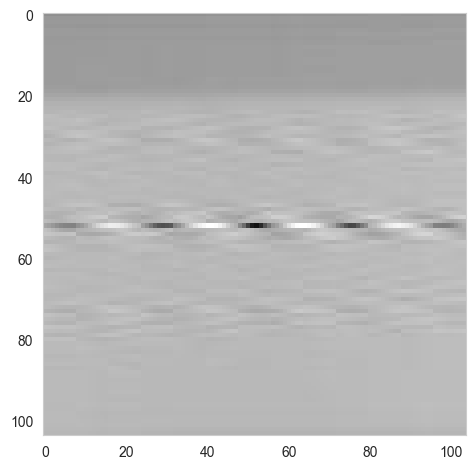

FA0004_GW01_H01_0202_20211108151145_farm_mic_snd_2d2e0a5543e5_35.jpg : [70.28566]


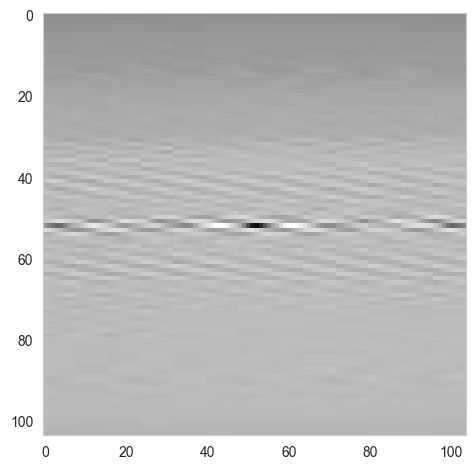

FA0004_GW01_H01_0202_20211108155145_farm_mic_snd_a7277a444836_02.jpg : [72.1121]


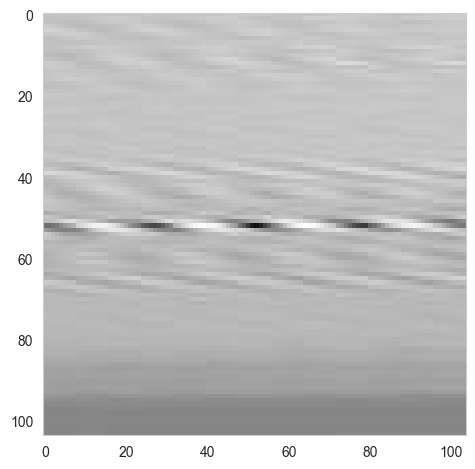

FA0004_GW01_H01_0202_20211108164145_farm_mic_snd_744caeef4f80_10.jpg : [79.22871]


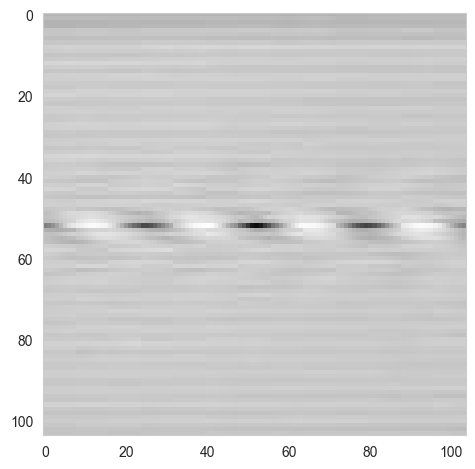

FA0004_GW01_H01_0202_20211108164145_farm_mic_snd_744caeef4f80_14.jpg : [74.12803]


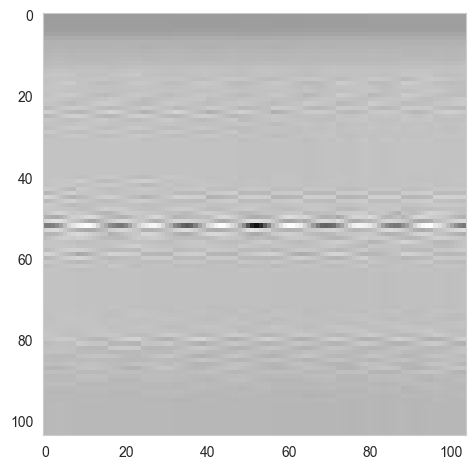

FA0004_GW01_H01_0202_20211108164145_farm_mic_snd_744caeef4f80_50.jpg : [81.23604]


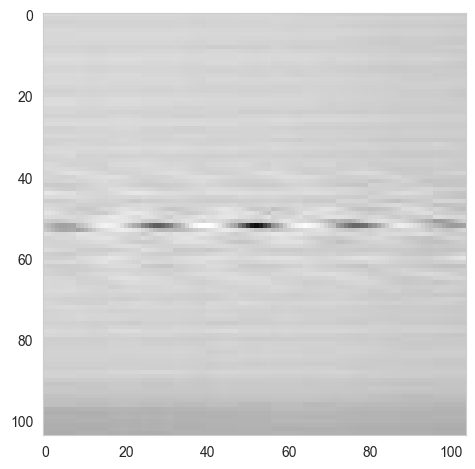

FA0004_GW01_H01_0202_20211108164145_farm_mic_snd_744caeef4f80_57.jpg : [66.65219]


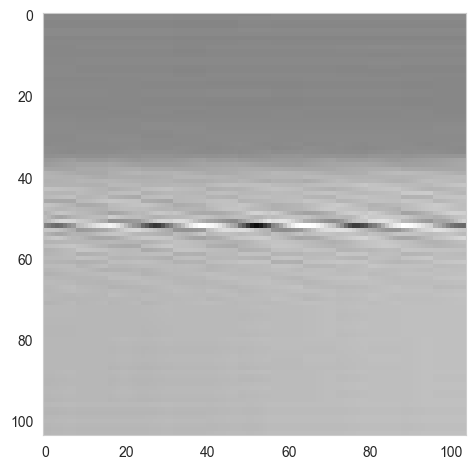

In [48]:
# abnormal
# fileListabnormal = rawDf[(rawDf.recon_error > 10.) & (rawDf.recon_error < 30.) & (rawDf.isInfected == 1.0)]['fileName'].to_list()
fileListabnormal = rawDf[(rawDf.tsneClass == 0) & (rawDf.isInfected == 1.0)]['fileName'].to_list()
len(fileListabnormal)
for idx, aName in enumerate(fileListabnormal) : 
    if idx > 50 : break
    aFileName = '../output/ilt_20211108_20211109/abnormal/' + aName
    print(f"{aName} : {rawDf[rawDf.fileName == aName]['recon_error'].values}")
    aImg = plt.imread(aFileName)
    plt.imshow(aImg)
    # plt.axis('off')
    plt.grid(visible=False)
    plt.tight_layout()
    plt.show()

In [54]:
import glob, os
pd.DataFrame([(os.path.basename(x),0) for x in glob.glob('../output/ilt_20211108_20211109/abnormal/' + os.path.sep + '*.jpg') ], columns = ['filename','label'])

filename  label
0      FA0004_GW01_H01_0203_20211109131146_farm_mic_s...      0
1      FA0004_GW01_H01_0203_20211109151152_farm_mic_s...      0
2      FA0004_GW01_H01_0202_20211109003645_farm_mic_s...      0
3      FA0004_GW01_H01_0203_20211109050147_farm_mic_s...      0
4      FA0004_GW01_H01_0203_20211109193146_farm_mic_s...      0
...                                                  ...    ...
51502  FA0004_GW01_H01_0203_20211109133650_farm_mic_s...      0
51503  FA0004_GW01_H01_0202_20211108204144_farm_mic_s...      0
51504  FA0004_GW01_H01_0202_20211108140144_farm_mic_s...      0
51505  FA0004_GW01_H01_0203_20211109212148_farm_mic_s...      0
51506  FA0004_GW01_H01_0203_20211109003145_farm_mic_s...      0

[51507 rows x 2 columns]

88

FA0004_GW01_H01_0202_20211108020645_farm_mic_snd_dd483d8e4240_12.jpg : [54.63433]


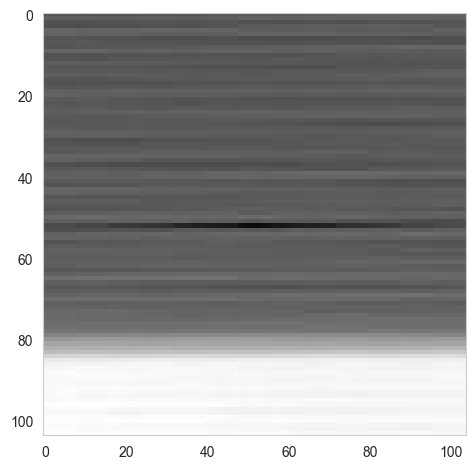

FA0004_GW01_H01_0202_20211108020645_farm_mic_snd_dd483d8e4240_26.jpg : [47.68431]


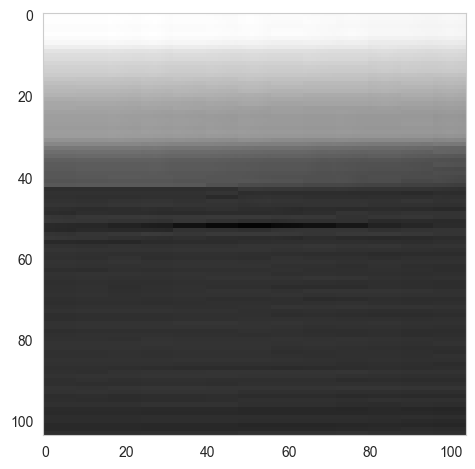

FA0004_GW01_H01_0202_20211108035145_farm_mic_snd_e13f81ad49ef_05.jpg : [63.656704]


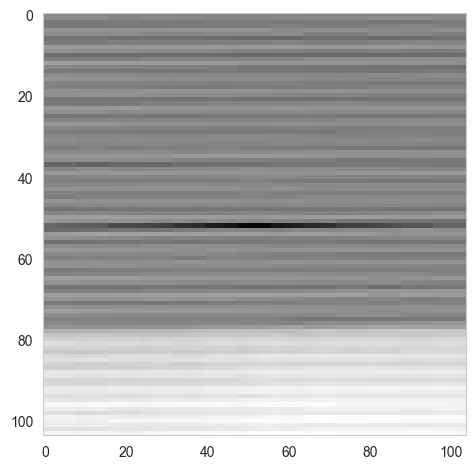

FA0004_GW01_H01_0202_20211108035145_farm_mic_snd_e13f81ad49ef_23.jpg : [33.866]


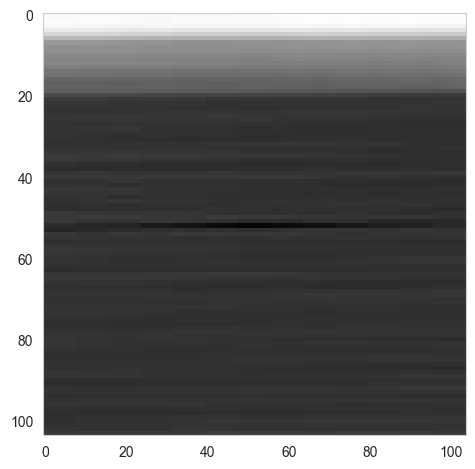

FA0004_GW01_H01_0202_20211108065144_farm_mic_snd_5473959d401d_27.jpg : [47.47404]


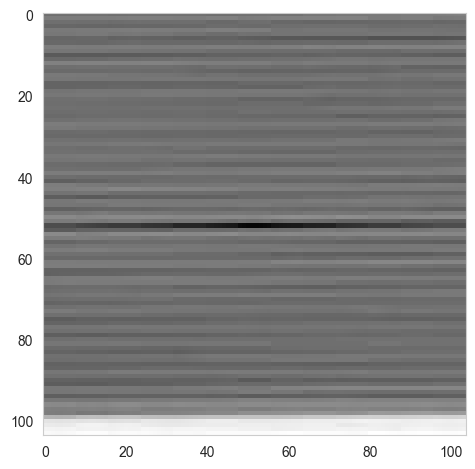

FA0004_GW01_H01_0202_20211108065144_farm_mic_snd_5473959d401d_28.jpg : [28.98969]


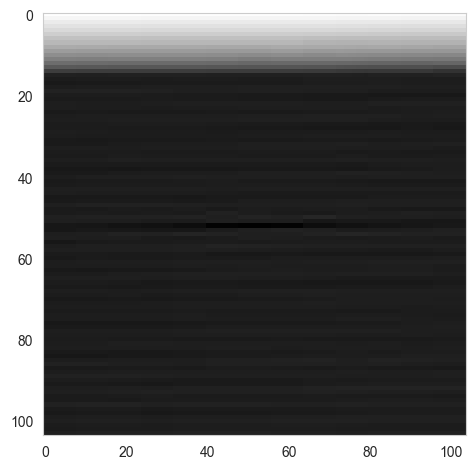

FA0004_GW01_H01_0202_20211108080145_farm_mic_snd_6426fdd34363_13.jpg : [59.21632]


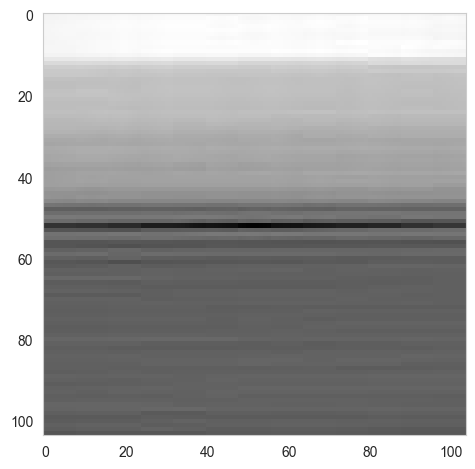

FA0004_GW01_H01_0202_20211108080145_farm_mic_snd_6426fdd34363_30.jpg : [55.708286]


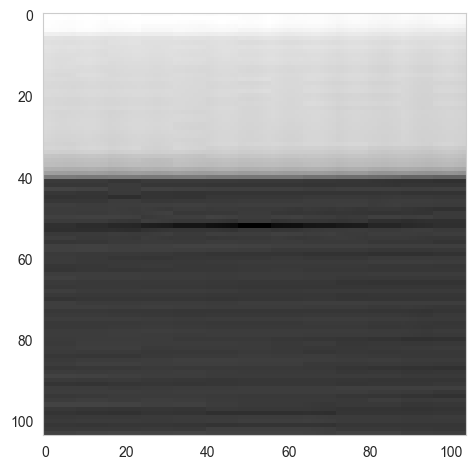

FA0004_GW01_H01_0202_20211108080145_farm_mic_snd_6426fdd34363_35.jpg : [53.031017]


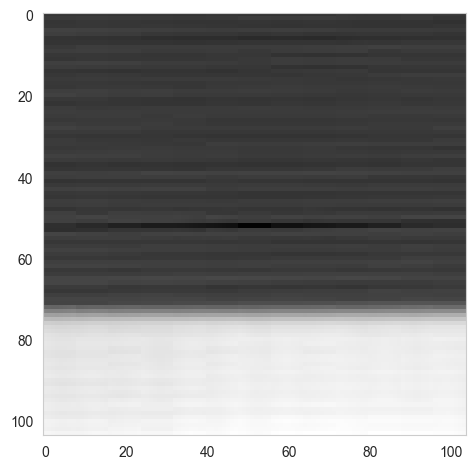

FA0004_GW01_H01_0202_20211108084144_farm_mic_snd_733c10ac4bd7_36.jpg : [64.02748]


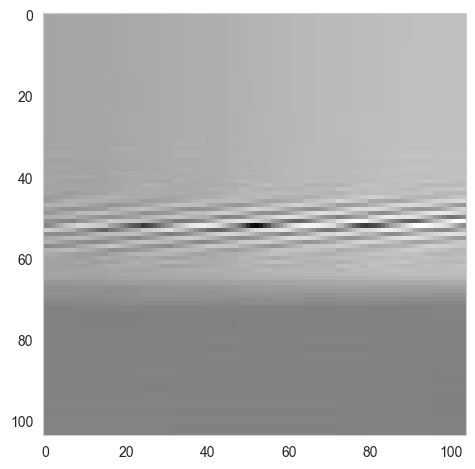

FA0004_GW01_H01_0202_20211108084144_farm_mic_snd_733c10ac4bd7_46.jpg : [54.72923]


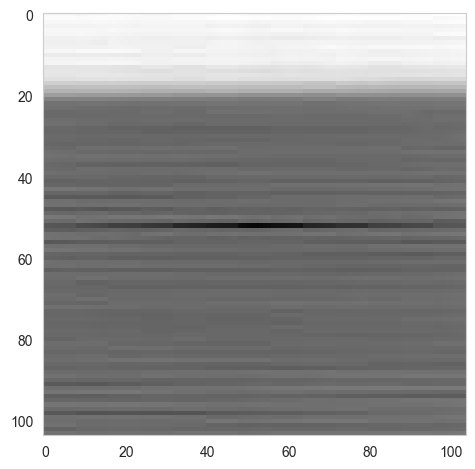

FA0004_GW01_H01_0202_20211108091144_farm_mic_snd_f7a3bcf049f0_00.jpg : [63.484615]


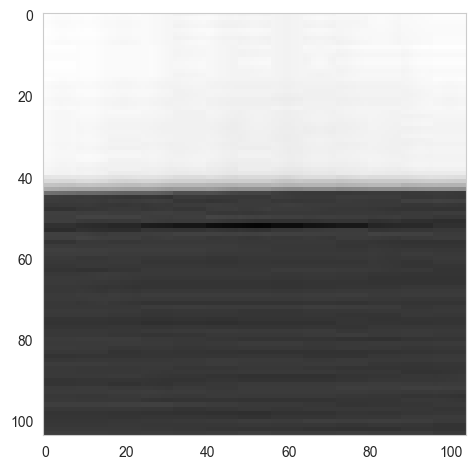

FA0004_GW01_H01_0202_20211108091144_farm_mic_snd_f7a3bcf049f0_14.jpg : [50.744366]


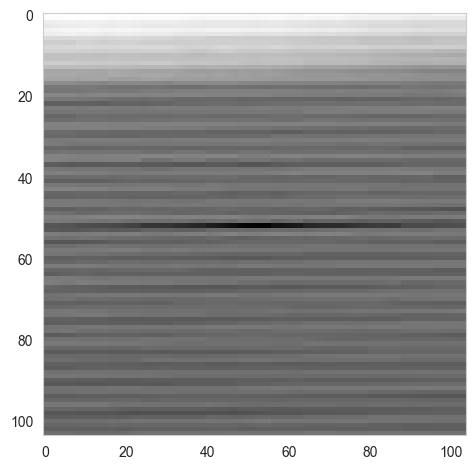

FA0004_GW01_H01_0202_20211108114143_farm_mic_snd_d476f28b4aea_27.jpg : [54.50243]


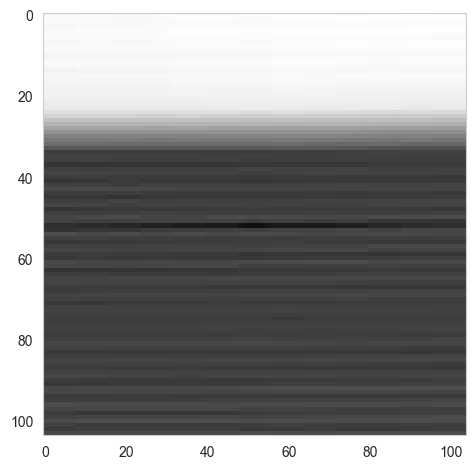

FA0004_GW01_H01_0202_20211108142145_farm_mic_snd_a263dc2048a5_33.jpg : [44.705585]


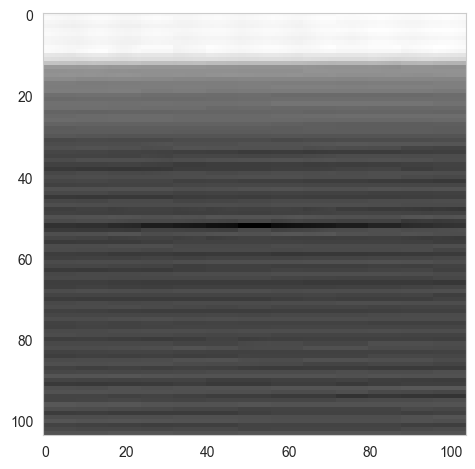

FA0004_GW01_H01_0202_20211108142145_farm_mic_snd_a263dc2048a5_50.jpg : [52.177]


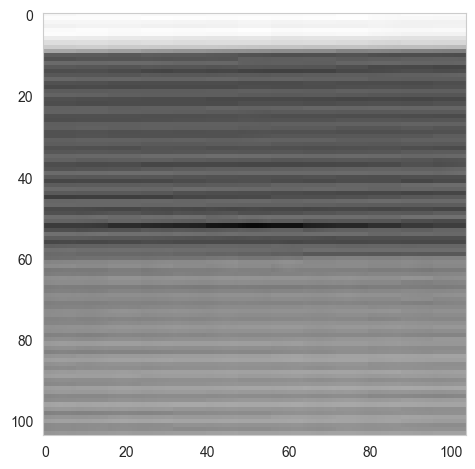

FA0004_GW01_H01_0202_20211108164145_farm_mic_snd_744caeef4f80_24.jpg : [63.30634]


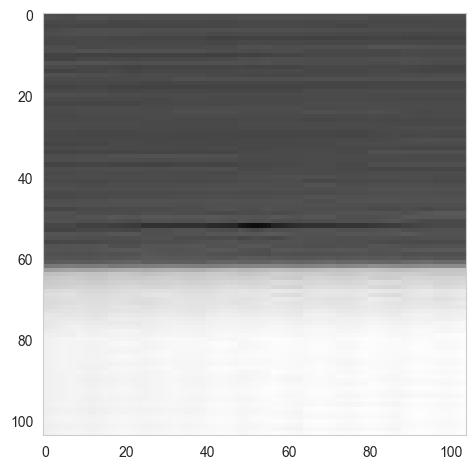

FA0004_GW01_H01_0202_20211108174644_farm_mic_snd_040230234071_25.jpg : [63.30458]


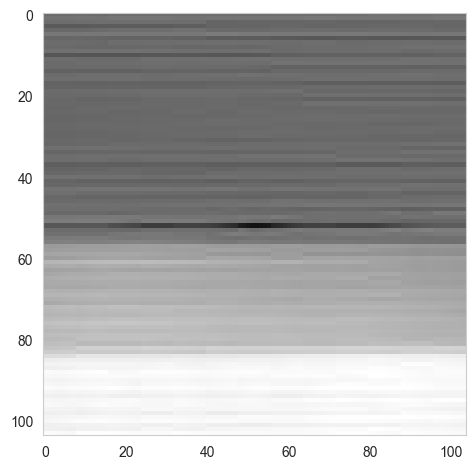

FA0004_GW01_H01_0202_20211108202145_farm_mic_snd_b77c036f472f_53.jpg : [59.826466]


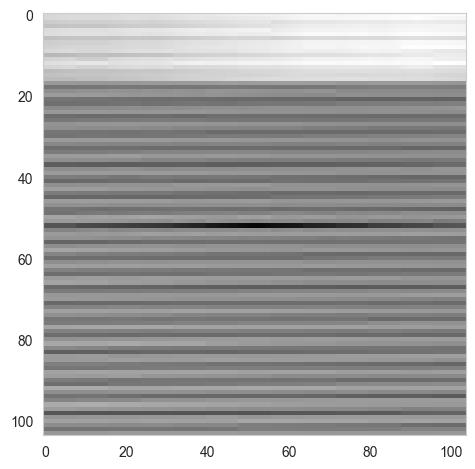

FA0004_GW01_H01_0202_20211108203644_farm_mic_snd_99eba2c0440b_49.jpg : [44.692333]


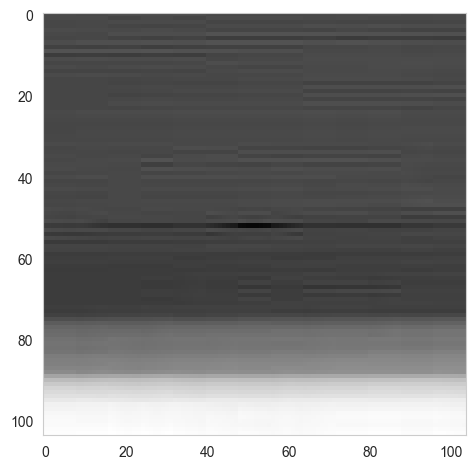

FA0004_GW01_H01_0202_20211108203644_farm_mic_snd_99eba2c0440b_50.jpg : [40.60253]


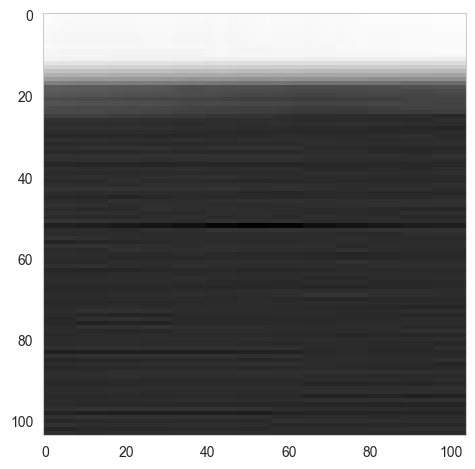

FA0004_GW01_H01_0202_20211109001645_farm_mic_snd_b777a1604689_56.jpg : [34.90121]


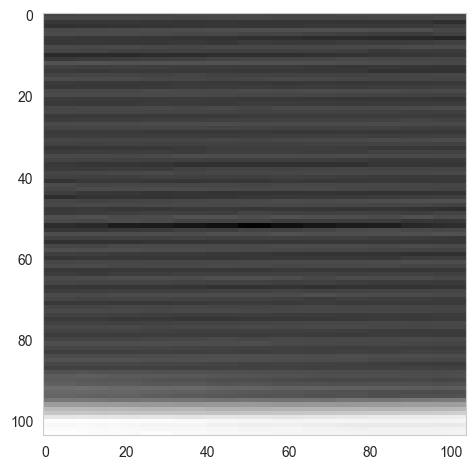

FA0004_GW01_H01_0202_20211109004145_farm_mic_snd_7c30f2d04298_51.jpg : [64.8294]


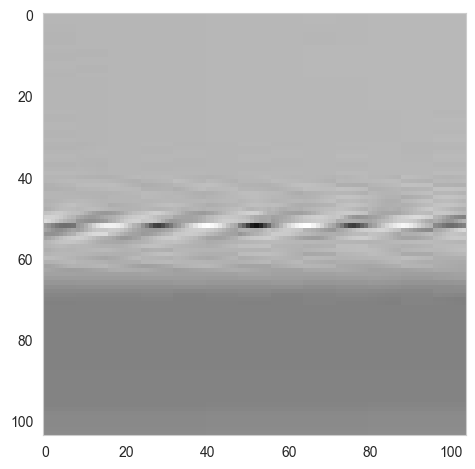

FA0004_GW01_H01_0202_20211109004145_farm_mic_snd_7c30f2d04298_52.jpg : [54.150517]


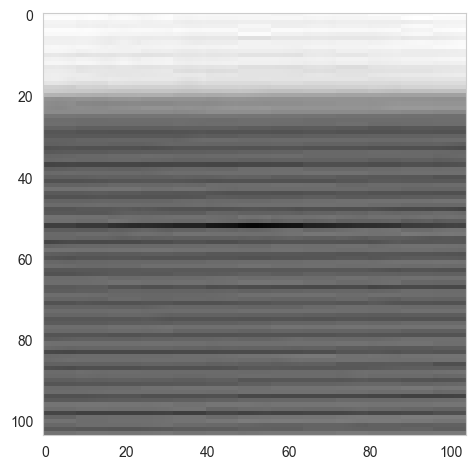

FA0004_GW01_H01_0202_20211109004145_farm_mic_snd_7c30f2d04298_53.jpg : [47.849976]


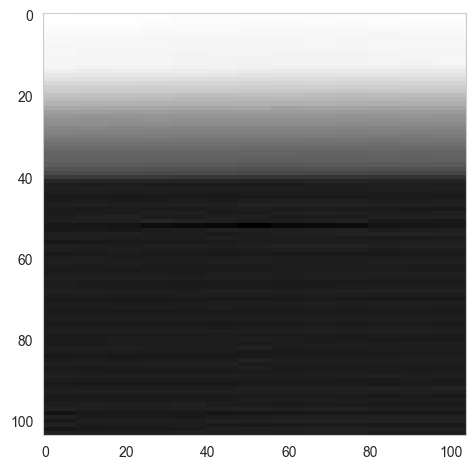

FA0004_GW01_H01_0202_20211109011145_farm_mic_snd_66d2005b4d76_30.jpg : [65.14561]


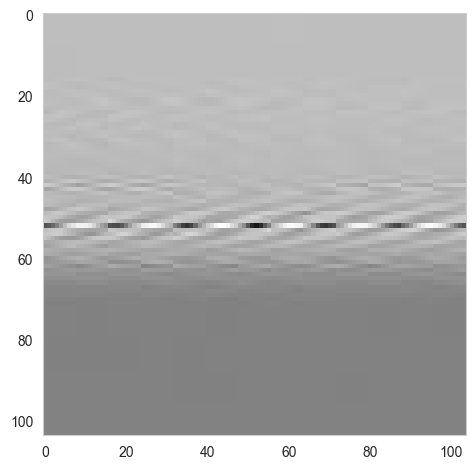

FA0004_GW01_H01_0202_20211109035644_farm_mic_snd_0bb0e48940bd_42.jpg : [55.20612]


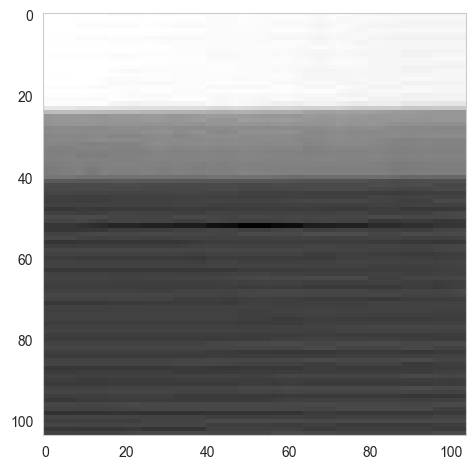

FA0004_GW01_H01_0202_20211109040145_farm_mic_snd_4c3c9566430b_09.jpg : [64.62388]


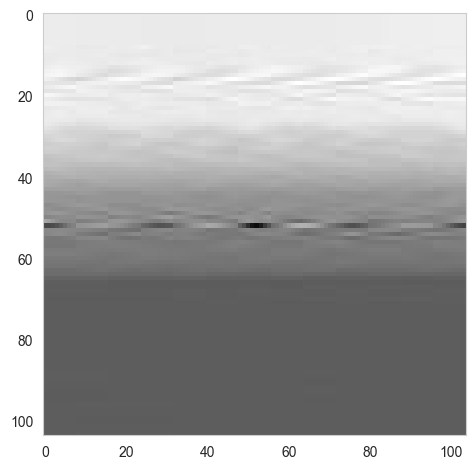

FA0004_GW01_H01_0202_20211109041645_farm_mic_snd_fee7de034b9b_30.jpg : [67.50922]


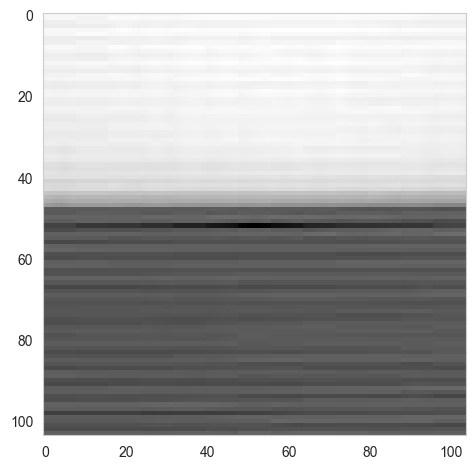

FA0004_GW01_H01_0202_20211109043146_farm_mic_snd_889a9ea04e01_25.jpg : [58.30321]


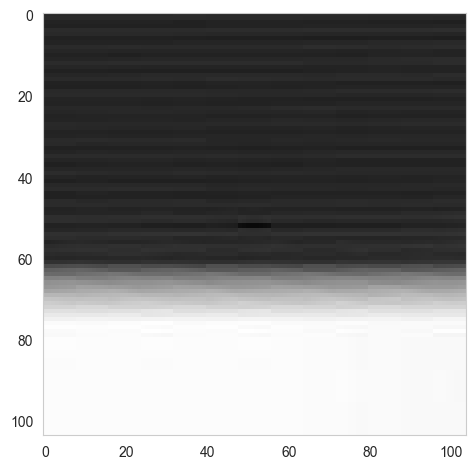

FA0004_GW01_H01_0202_20211109043146_farm_mic_snd_889a9ea04e01_29.jpg : [67.12459]


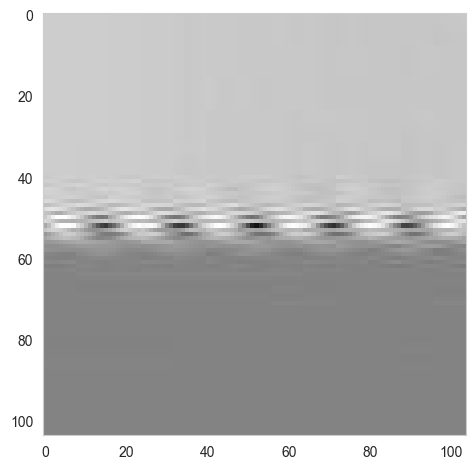

FA0004_GW01_H01_0202_20211109045646_farm_mic_snd_c05008614360_15.jpg : [42.41469]


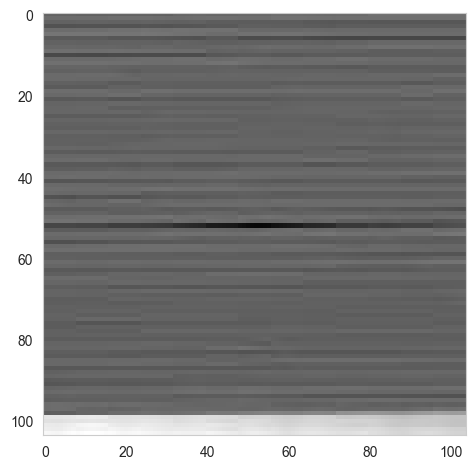

FA0004_GW01_H01_0202_20211109061645_farm_mic_snd_7a9aa2ef44f7_13.jpg : [46.680977]


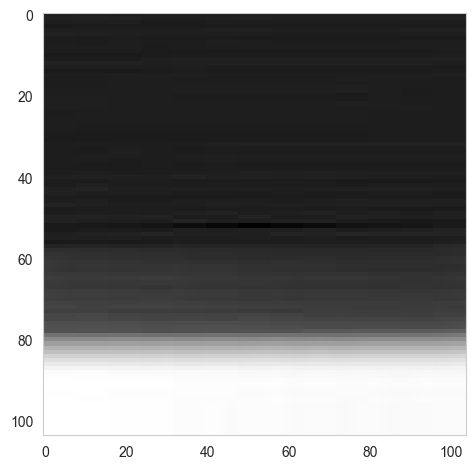

FA0004_GW01_H01_0202_20211109073649_farm_mic_snd_05c05dc14600_54.jpg : [64.96901]


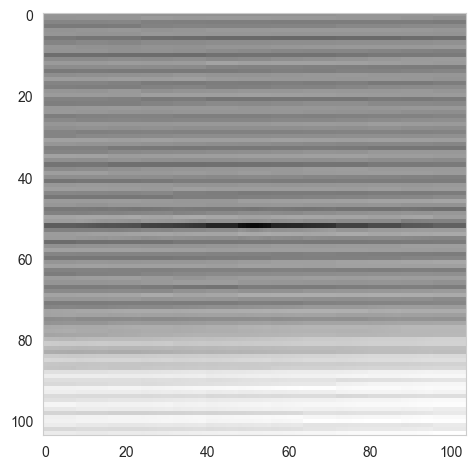

FA0004_GW01_H01_0202_20211109081147_farm_mic_snd_9d37a32b4777_26.jpg : [53.928207]


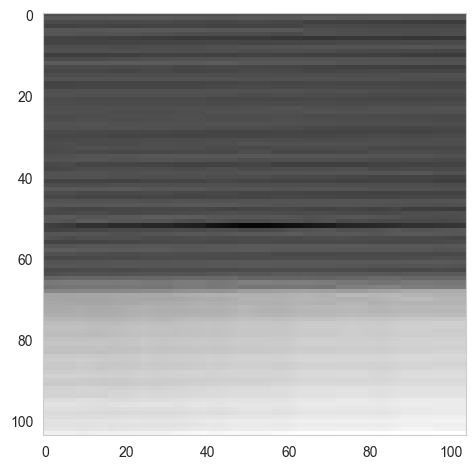

FA0004_GW01_H01_0202_20211109081147_farm_mic_snd_9d37a32b4777_41.jpg : [58.758522]


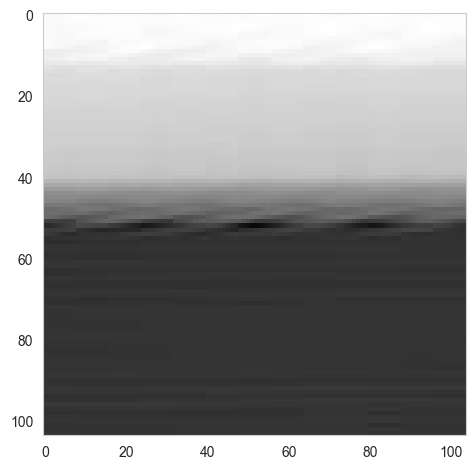

FA0004_GW01_H01_0202_20211109081147_farm_mic_snd_9d37a32b4777_47.jpg : [54.871304]


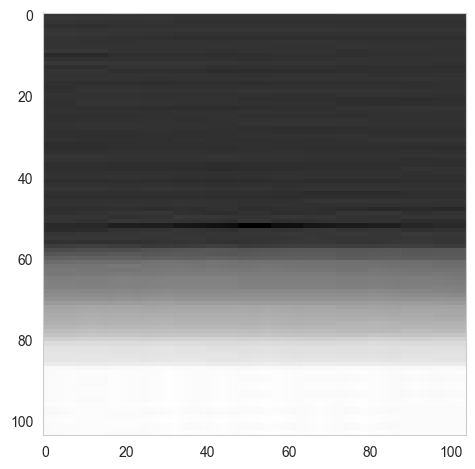

FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0_04.jpg : [59.66453]


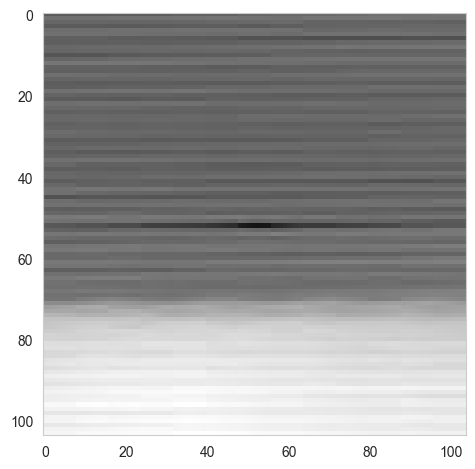

FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0_17.jpg : [59.391354]


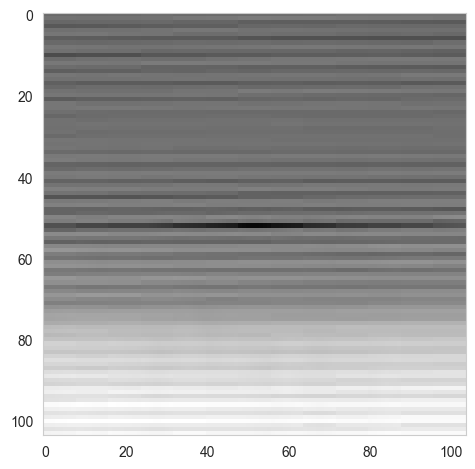

FA0004_GW01_H01_0202_20211109091147_farm_mic_snd_1569b63144e0_20.jpg : [67.995056]


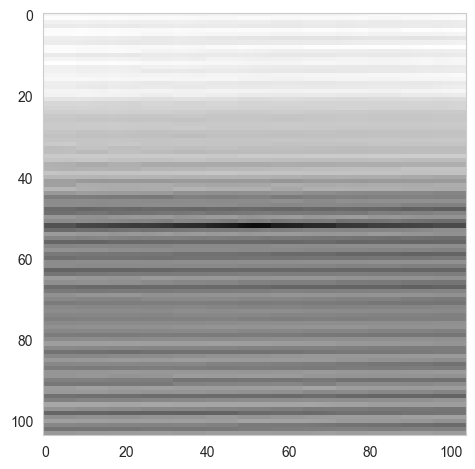

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_18.jpg : [55.731976]


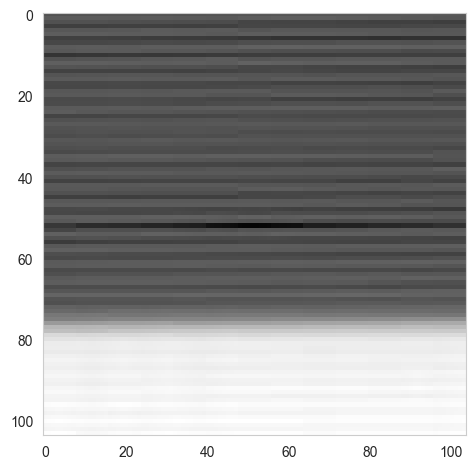

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_52.jpg : [60.440655]


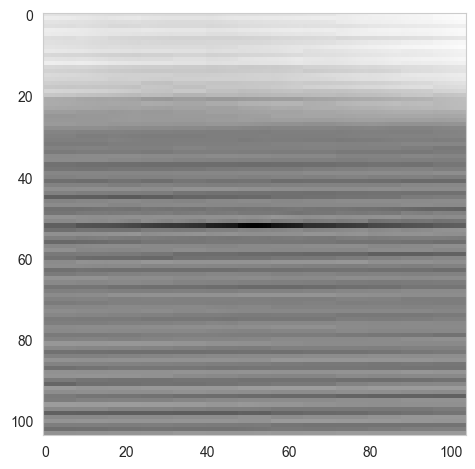

FA0004_GW01_H01_0202_20211109091648_farm_mic_snd_e6bc29a74101_54.jpg : [68.140205]


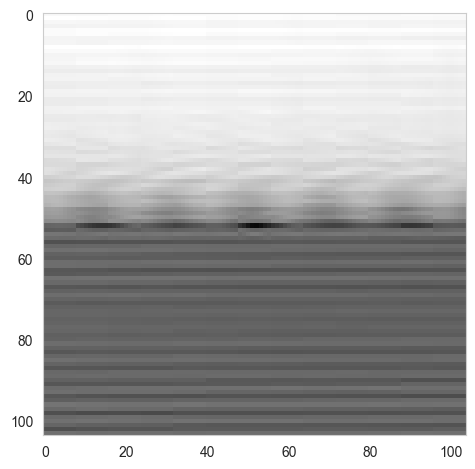

FA0004_GW01_H01_0202_20211109092647_farm_mic_snd_7a099f0d49da_21.jpg : [52.43956]


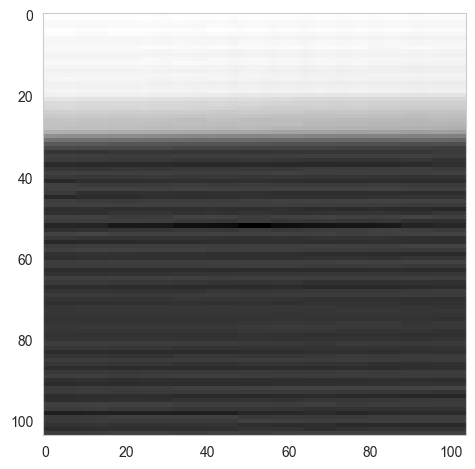

FA0004_GW01_H01_0202_20211109093645_farm_mic_snd_418b74944741_48.jpg : [64.50962]


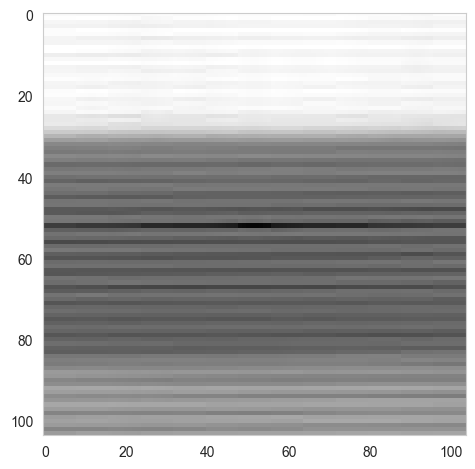

FA0004_GW01_H01_0202_20211109094648_farm_mic_snd_d9a40dc6470f_45.jpg : [61.23789]


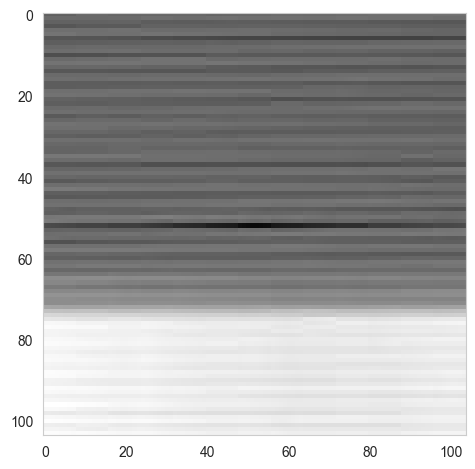

FA0004_GW01_H01_0202_20211109094648_farm_mic_snd_d9a40dc6470f_58.jpg : [61.96777]


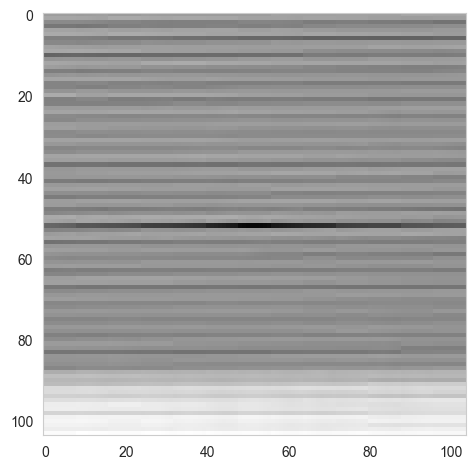

FA0004_GW01_H01_0202_20211109100148_farm_mic_snd_d9ff5f3c4c83_02.jpg : [55.473408]


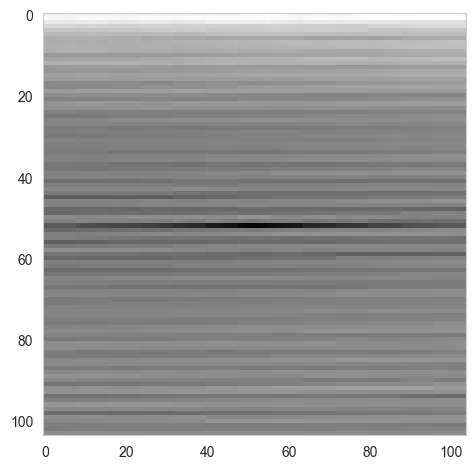

FA0004_GW01_H01_0202_20211109100646_farm_mic_snd_e83bb1e5410c_52.jpg : [52.65634]


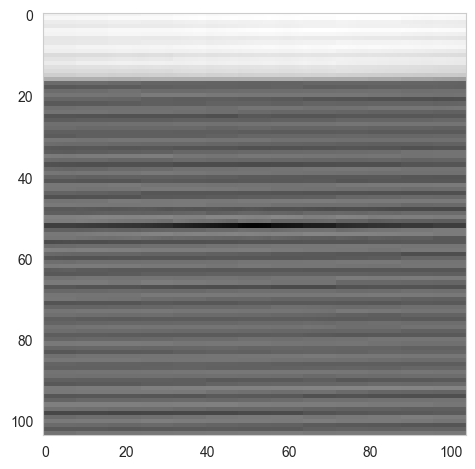

FA0004_GW01_H01_0202_20211109104144_farm_mic_snd_3111d6194da9_35.jpg : [57.82705]


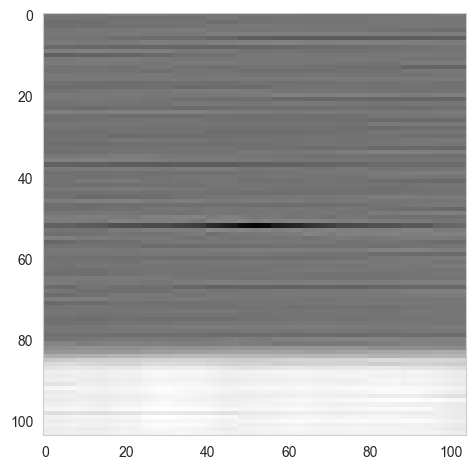

FA0004_GW01_H01_0202_20211109104144_farm_mic_snd_3111d6194da9_38.jpg : [59.642857]


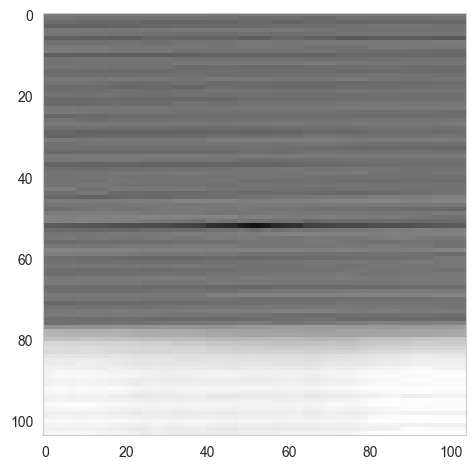

In [49]:
# abnormal
# fileListabnormal = rawDf[(rawDf.recon_error > 10.) & (rawDf.recon_error < 30.) & (rawDf.isInfected == 1.0)]['fileName'].to_list()
fileListabnormal = rawDf[(rawDf.tsneClass == 1) & (rawDf.isInfected == 1.0)]['fileName'].to_list()
len(fileListabnormal)
for idx, aName in enumerate(fileListabnormal) : 
    if idx > 50 : break
    aFileName = '../output/ilt_20211108_20211109/abnormal/' + aName
    print(f"{aName} : {rawDf[rawDf.fileName == aName]['recon_error'].values}")
    aImg = plt.imread(aFileName)
    plt.imshow(aImg)
    # plt.axis('off')
    plt.grid(visible=False)
    plt.tight_layout()
    plt.show()

### TSNE

In [53]:
rawDf['t_v'][0]
rawDf['lv'][0]

array([-0.8657598 ,  0.26836744,  0.2985441 ,  0.29884824])

array([0.33124253, 0.5732816 , 0.6453665 , 0.4024513 , 0.47623506,
       0.2726389 , 0.42006326, 0.3450906 , 0.39779136, 0.6339711 ,
       0.5199055 , 0.84570706, 0.2617078 , 0.47793865, 0.45377466,
       0.40832686, 0.3887878 , 0.36550468, 0.49088636, 0.5849173 ,
       0.47229493, 0.4700383 , 0.44692028, 0.57796973, 0.4966063 ,
       0.5984291 , 0.29739726, 0.5512095 , 0.2944901 , 0.44328123,
       0.29283994, 0.5326754 ])

In [16]:
# rawDf['t_v'] = [np.fromstring(x[2:-2], sep = ' ') for x in rawDf.t_v]
# rawDf['lv'] = [np.fromstring(x[1:-1], sep = ' ') for x in rawDf.lv]

In [25]:
rawDf.head(2)

fileName  recon_error  \
0  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...    85.645699   
1  FA0004_GW01_H01_0202_20211108000647_farm_mic_s...    81.154343   

                                                 t_v  \
0  [[-0.8524038, 0.14019267, 0.34800395, 0.3642073]]   
1  [[-0.85236317, 0.13996583, 0.3480842, 0.3643131]]   

                                                  lv  isInfected  \
0  [0.40855324, 0.46510977, 0.7097476, 0.56814486...         0.0   
1  [0.27788466, 0.36511216, 0.42506468, 0.5379058...         0.0   

           createTime  
0 2021-11-08 00:06:47  
1 2021-11-08 00:06:47

In [37]:
from sklearn.preprocessing import StandardScaler
X_test_results_test = list(zip(rawDf.recon_error,rawDf.t_v, rawDf.lv))
X_test_results_test = [[x[0], *x[1].flatten(),*x[2].flatten()] for x in X_test_results_test]
#X_test_results_test = [list(x[1].flatten()) for x in X_test_results_test]
# X_test_results_test

X_test_results_test = StandardScaler().fit(X_test_results_test).transform(X_test_results_test)
X_test_results_test
len(X_test_results_test)

array([[ 0.85093073, -0.71871199,  0.72385341, ...,  0.60115494,
         1.52404438, -1.65249948],
       [-0.10310083,  0.07035432, -0.07259477, ..., -0.40015954,
        -2.03368632, -0.58102143],
       [ 0.08594519, -0.02220478,  0.01980013, ...,  0.08008625,
         0.87091737, -1.2431823 ],
       ...,
       [-0.74913446,  0.40356707, -0.40727775, ...,  0.96135361,
         0.8736299 ,  0.73009532],
       [ 0.02353109, -0.0812112 ,  0.08111769, ...,  0.34995614,
        -0.44555842, -1.02129583],
       [-1.25275317,  0.86404858, -0.86820584, ..., -0.61858043,
        -0.91825388,  0.92347904]])

116761

In [38]:
from sklearn.manifold import TSNE

# t-SNE 모델 생성 및 학습
tsne = TSNE(n_components=2, random_state=0, verbose=1, perplexity=100, n_iter=250)
digits_tsne_test = tsne.fit_transform(X_test_results_test)

/Users/hansgun/.pyenv/versions/3.9.14/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hansgun/.pyenv/versions/3.9.14/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 116761 samples in 0.057s...
[t-SNE] Computed neighbors for 116761 samples in 96.934s...
[t-SNE] Computed conditional probabilities for sample 1000 / 116761
[t-SNE] Computed conditional probabilities for sample 2000 / 116761
[t-SNE] Computed conditional probabilities for sample 3000 / 116761
[t-SNE] Computed conditional probabilities for sample 4000 / 116761
[t-SNE] Computed conditional probabilities for sample 5000 / 116761
[t-SNE] Computed conditional probabilities for sample 6000 / 116761
[t-SNE] Computed conditional probabilities for sample 7000 / 116761
[t-SNE] Computed conditional probabilities for sample 8000 / 116761
[t-SNE] Computed conditional probabilities for sample 9000 / 116761
[t-SNE] Computed conditional probabilities for sample 10000 / 116761
[t-SNE] Computed conditional probabilities for sample 11000 / 116761
[t-SNE] Computed conditional probabilities for sample 12000 / 116761
[t-SNE] Computed conditional proba

In [39]:
rawDf.isInfected.value_counts()
colors_pred_test = np.where(rawDf['isInfected'] == 1.0, 'abnormal','normal')
_colors_pred_test = np.where(rawDf['isInfected']  == 1.0, 'red','green')
normal_index = np.where(colors_pred_test =='normal')[0].tolist()
abnormal_index = np.where(colors_pred_test =='abnormal')[0].tolist()

0.0    116420
1.0       341
Name: isInfected, dtype: int64

#### standard scaler

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'normal')

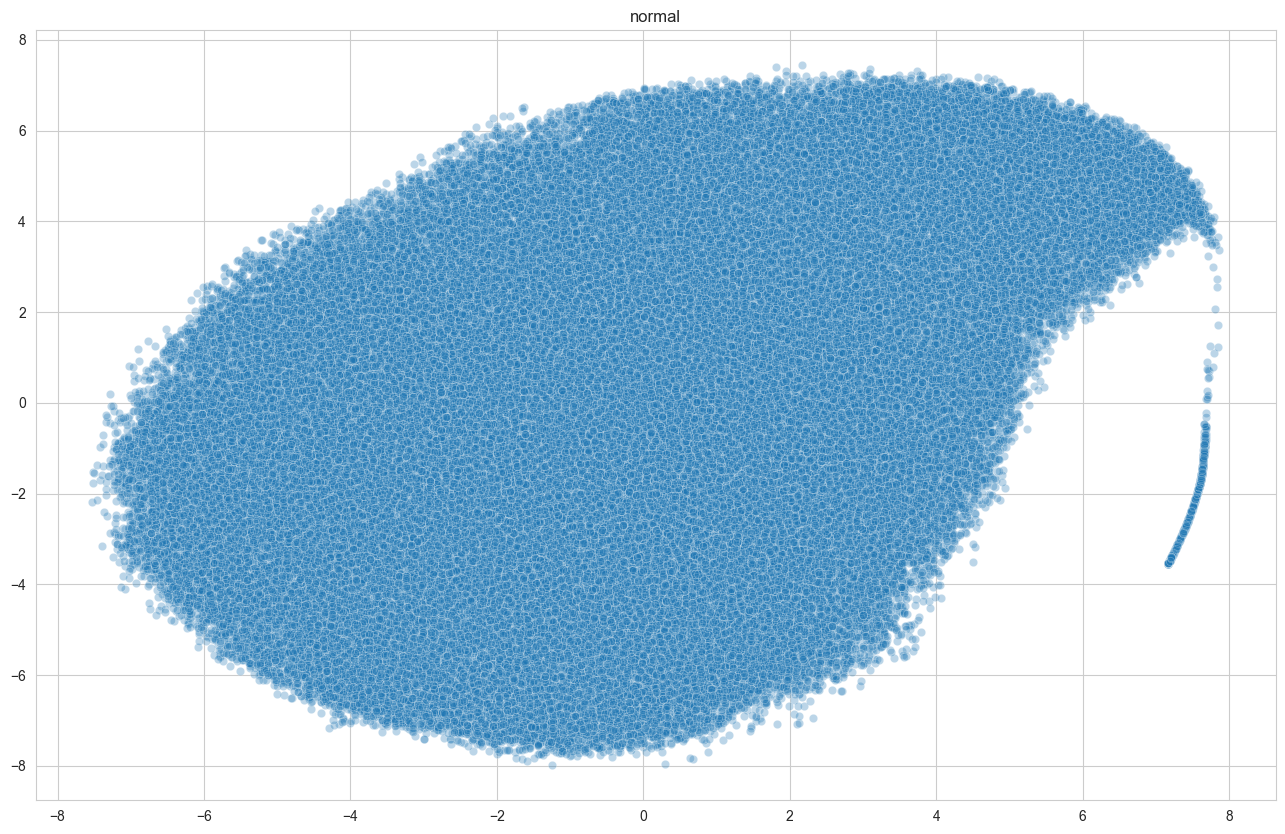

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'abnormal')

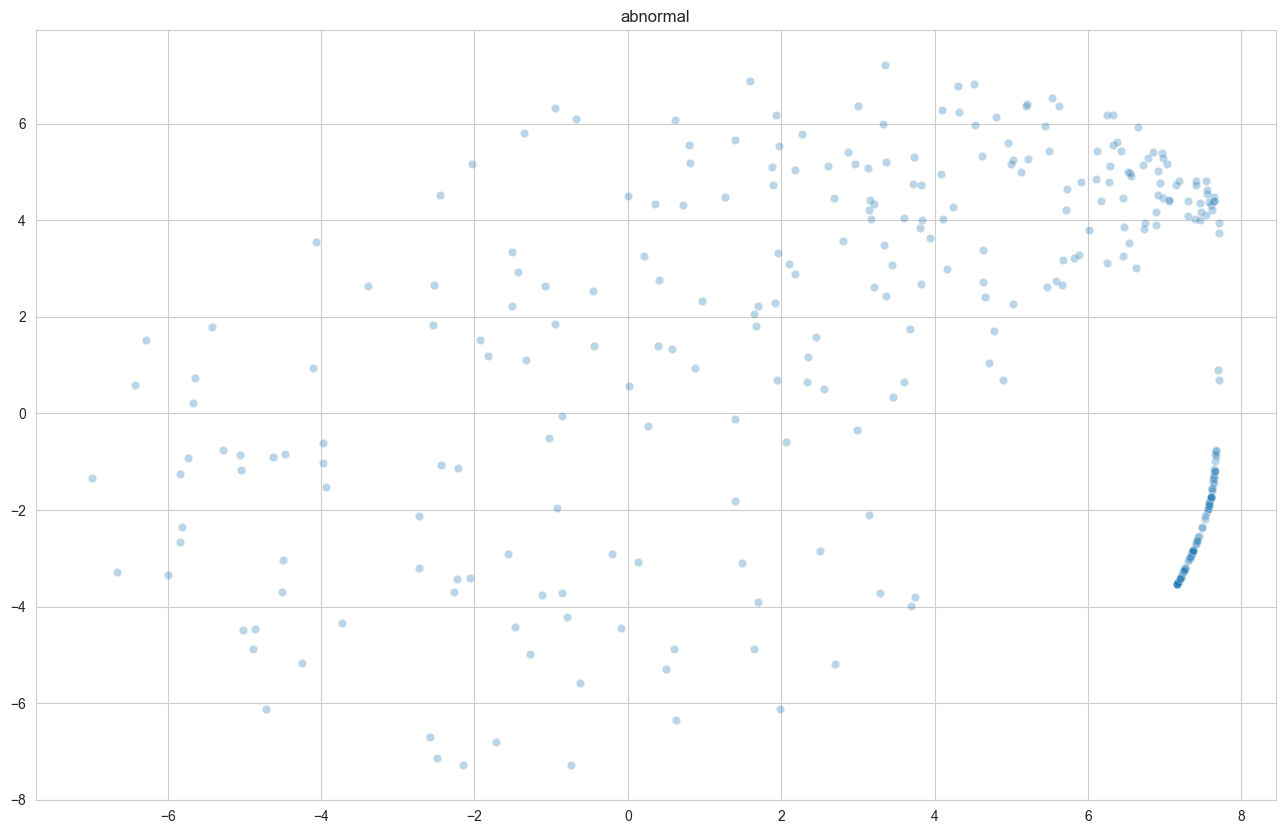

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'all')

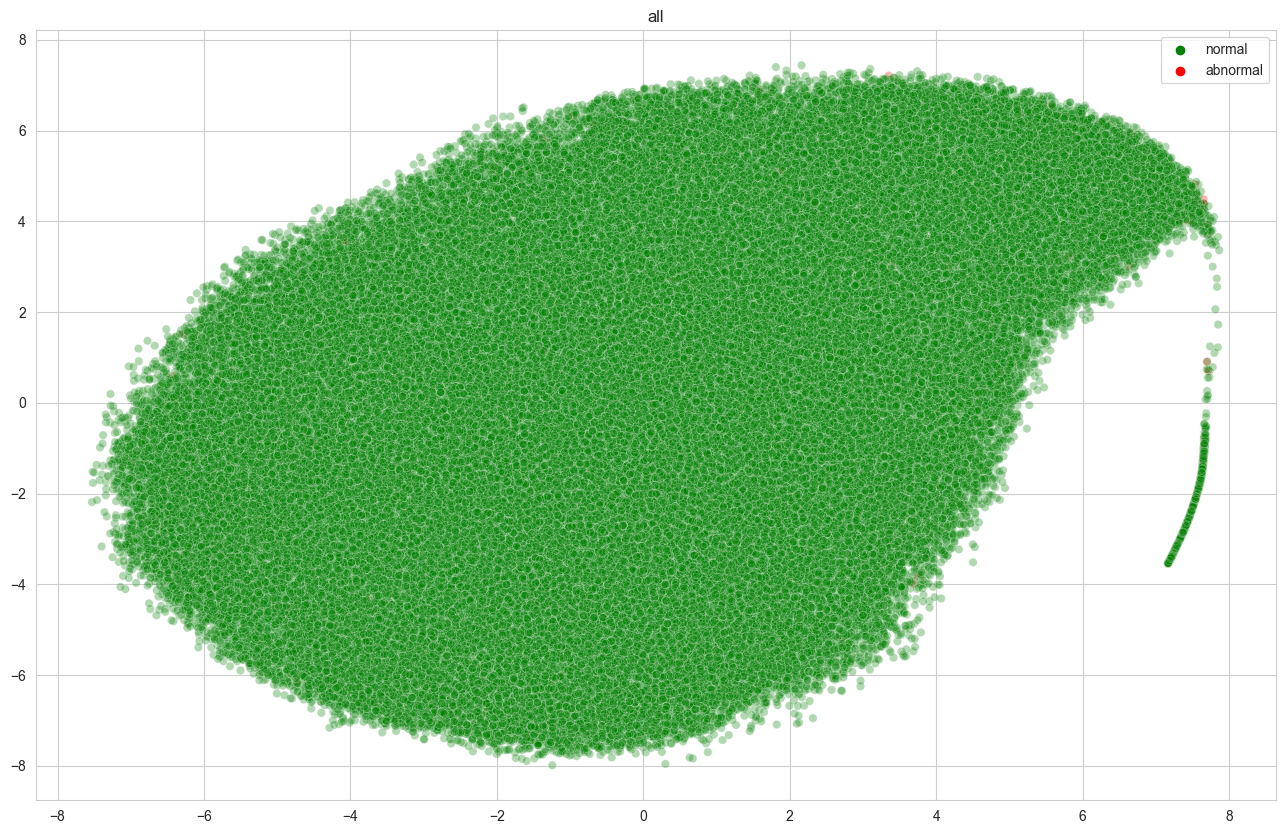

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
# circle1 = plt.Circle(xy=(0, 0), radius=53, color='red', fill=False)
ax = sns.scatterplot(
    x=digits_tsne_test[normal_index,0], y=digits_tsne_test[normal_index,1],
    # palette=sns.color_palette("hls", 2),hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)

# ax.add_patch(circle1)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("normal")
plt.show() 

plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
# circle1 = plt.Circle(xy=(0, 0), radius=53, color='red', fill=False)
ax = sns.scatterplot(
    x=digits_tsne_test[abnormal_index,0], y=digits_tsne_test[abnormal_index,1],
    # palette=sns.color_palette("hls", 2),hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)

# ax.add_patch(circle1)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("abnormal")
plt.show() 

plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
ax = sns.scatterplot(
    x=digits_tsne_test[:,0], y=digits_tsne_test[:,1],
    palette=['green','red'],hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)

# ax.add_patch(circle1)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("all")
plt.show() 




#### radius setting

In [141]:
cRadius = 3.4

<Figure size 1000x700 with 0 Axes>

Text(0.5, 1.0, 'all')

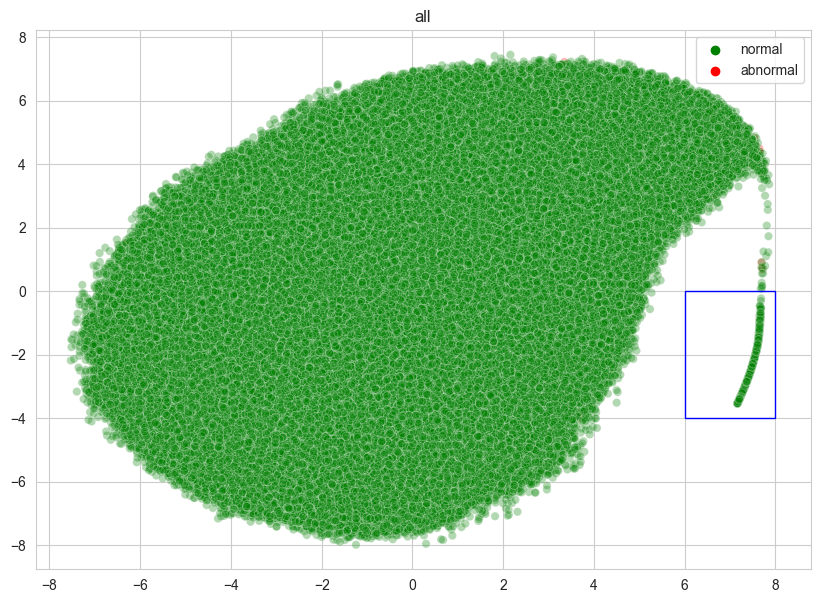

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    x=digits_tsne_test[:,0], y=digits_tsne_test[:,1],
    palette=['green','red'],hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)
# circle1 = plt.Circle(xy=(-.75, -.4), radius=cRadius, color='blue', fill=False)
rect = plt.Rectangle(xy=(6, -4), width=2, height=4, color='blue', fill=False)
ax.add_patch(rect)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("all")
plt.show() 

In [40]:
def isOut(x) : 
    return x[0] > 6. and x[1] < 0

644

In [45]:


rawDf['tsneClass'] = np.where((digits_tsne_test[:,0] > 6) & (digits_tsne_test[:,1] < 0), 1, 0).tolist()

In [112]:
with open('./rawDfTsne.pickle','bw') as f : 
    pickle.dump(rawDf, f)

In [46]:
rawDf[rawDf.tsneClass == 1]

fileName  recon_error  \
26      FA0004_GW01_H01_0202_20211108000647_farm_mic_s...    64.027863   
33      FA0004_GW01_H01_0202_20211108000647_farm_mic_s...    59.917843   
709     FA0004_GW01_H01_0202_20211108010645_farm_mic_s...    67.401329   
736     FA0004_GW01_H01_0202_20211108010645_farm_mic_s...    63.585381   
738     FA0004_GW01_H01_0202_20211108010645_farm_mic_s...    56.883987   
...                                                   ...          ...   
113361  FA0004_GW01_H01_0201_20211109192151_farm_mic_s...    49.232212   
114028  FA0004_GW01_H01_0201_20211109201649_farm_mic_s...    61.732609   
114628  FA0004_GW01_H01_0201_20211109210649_farm_mic_s...    61.384579   
115453  FA0004_GW01_H01_0201_20211109221648_farm_mic_s...    60.167049   
115551  FA0004_GW01_H01_0201_20211109222649_farm_mic_s...    64.257133   

                                                      t_v  \
26      [[-0.85215294, 0.13880162, 0.3484791, 0.364872...   
33      [[-0.8521312, 0.13868043, 0.34853438, 0.364916...   
709     [[-0.8521566, 0.13881952, 0.34849843, 0.364838...   
736     [[-0.85212016, 0.13861866, 0.34856498, 0.36493...   
738     [[-0.85200524, 0.13798685, 0.34877443, 0.36524...   
...                                                   ...   
113361  [[-0.85172004, 0.13642581, 0.34933928, 0.36595...   
114028   [[-0.852158, 0.13882874, 0.34847987, 0.3648494]]   
114628  [[-0.85215163, 0.13879357, 0.34849137, 0.36486...   
115453  [[-0.8521323, 0.13868707, 0.34852877, 0.364916...   
115551     [[-0.8521955, 0.1390365, 0.3484031, 0.364756]]   

                                                       lv  isInfected  \
26      [0.44916108, 0.44119212, 0.62307, 0.3920566, 0...         0.0   
33      [0.47848764, 0.4564945, 0.48851514, 0.5842793,...         0.0   
709     [0.34162715, 0.43581817, 0.3724405, 0.44053832...         0.0   
736     [0.41297254, 0.479553, 0.4914412, 0.43403578, ...         0.0   
738     [0.7135391, 0.5394897, 0.4466961, 0.42321137, ...         0.0   
...                                                   ...         ...   
113361  [0.35812435, 0.47644186, 0.3886203, 0.6426334,...         0.0   
114028  [0.51075125, 0.40848497, 0.49006125, 0.6541195...         0.0   
114628  [0.42672622, 0.30980584, 0.53220063, 0.3202048...         0.0   
115453  [0.4398335, 0.45354566, 0.4552424, 0.4082716, ...         0.0   
115551  [0.67136383, 0.6249256, 0.5990581, 0.55646807,...         0.0   

                createTime  tsneClass  
26     2021-11-08 00:06:47          1  
33     2021-11-08 00:06:47          1  
709    2021-11-08 01:06:45          1  
736    2021-11-08 01:06:45          1  
738    2021-11-08 01:06:45          1  
...                    ...        ...  
113361 2021-11-09 19:21:51          1  
114028 2021-11-09 20:16:49          1  
114628 2021-11-09 21:06:49          1  
115453 2021-11-09 22:16:48          1  
115551 2021-11-09 22:26:49          1  

[644 rows x 7 columns]

### tsne outlier image 

In [167]:
rawDf[(rawDf.tsneClass == 1) & ((rawDf.moduleId.str.contains('0200|0201')))]['fileName'].to_csv('./filelistTsneNormal.csv')

In [163]:
rawDf['moduleId'] = [x.split('_')[3] for x in rawDf.fileName]

In [195]:
idx = 3
(audio, samplerate) = librosa.load('../data/ILT/20211108_20211109/FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2.wav', sr=44100)
IPython.display.Audio(data=audio[samplerate*(idx):samplerate*(idx+1)], rate=samplerate)

FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_04.jpg : [7.4790053], [0.]


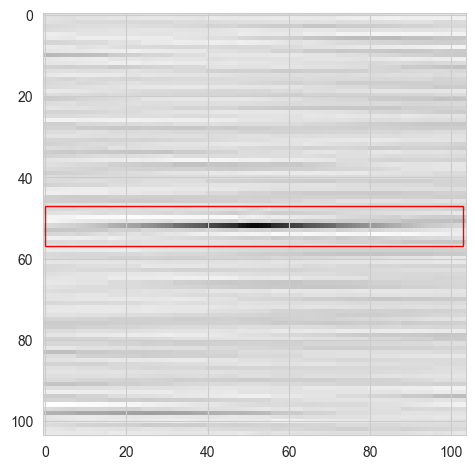

In [205]:
import matplotlib.patches as patches
aName = 'FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_04.jpg'
moduleId = aName.split('_')[3]
aDate = aName.split('_')[4][:8]
if moduleId >= '0202' :
    aFileName = '../output/ilt_20211108_20211109/abnormal/' + aName
else : 
    aFileName = '../output/ilt_20211108_20211109/normal/' + aDate + '/' + aName

print(f"{aName} : {rawDf[rawDf.fileName == aName]['recon_error'].values}, {rawDf[rawDf.fileName == aName]['isInfected'].values}")
aImg = plt.imread(aFileName)
fig, ax = plt.subplots()
ax.imshow(aImg)
rect = patches.Rectangle((0, 47), 103, 10, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
# plt.axis('off')
plt.grid(visible=True)
plt.tight_layout()
plt.show()

10980

FA0004_GW01_H01_0200_20211108012145_farm_mic_snd_7953da864708.wav
FA0004_GW01_H01_0200_20211108012145_farm_mic_snd_7953da864708_32.jpg : [7.307412], [0.]


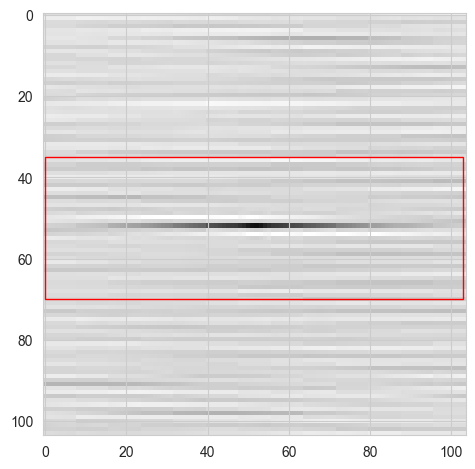

FA0004_GW01_H01_0200_20211108012145_farm_mic_snd_7953da864708.wav
FA0004_GW01_H01_0200_20211108012145_farm_mic_snd_7953da864708_38.jpg : [6.9667144], [0.]


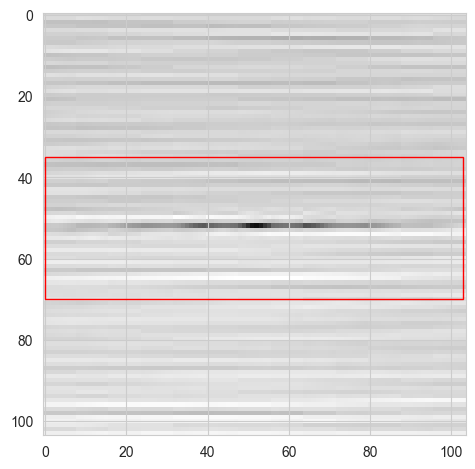

FA0004_GW01_H01_0200_20211108012145_farm_mic_snd_7953da864708.wav
FA0004_GW01_H01_0200_20211108012145_farm_mic_snd_7953da864708_40.jpg : [4.433475], [0.]


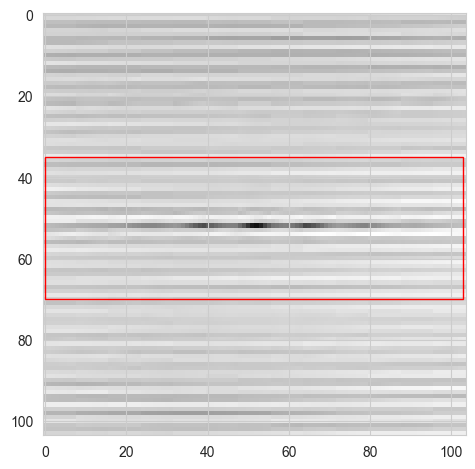

FA0004_GW01_H01_0200_20211108012145_farm_mic_snd_7953da864708.wav
FA0004_GW01_H01_0200_20211108012145_farm_mic_snd_7953da864708_41.jpg : [6.8168683], [0.]


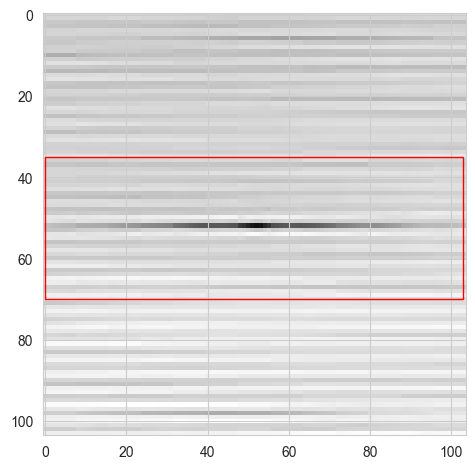

FA0004_GW01_H01_0200_20211108012145_farm_mic_snd_7953da864708.wav
FA0004_GW01_H01_0200_20211108012145_farm_mic_snd_7953da864708_47.jpg : [4.676668], [0.]


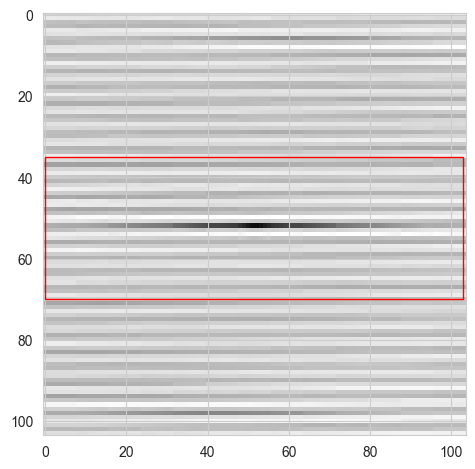

FA0004_GW01_H01_0200_20211108012145_farm_mic_snd_7953da864708.wav
FA0004_GW01_H01_0200_20211108012145_farm_mic_snd_7953da864708_50.jpg : [3.568756], [0.]


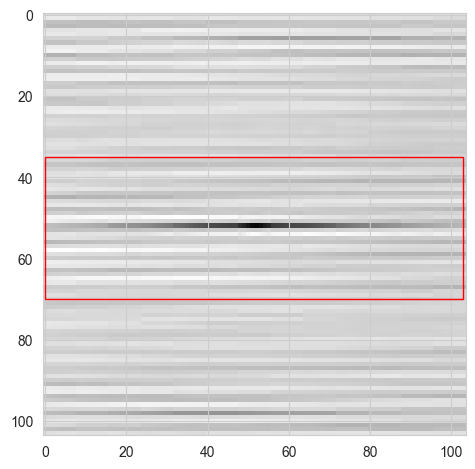

FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8.wav
FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8_01.jpg : [5.455612], [0.]


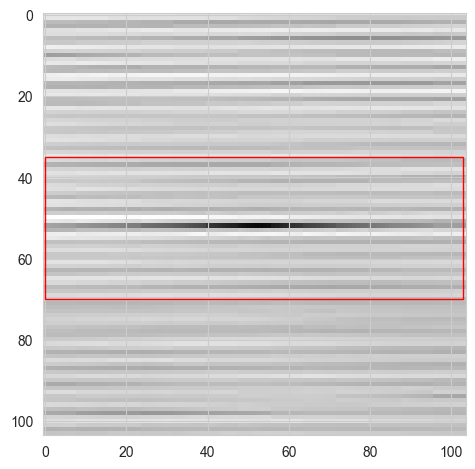

FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8.wav
FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8_13.jpg : [6.934541], [0.]


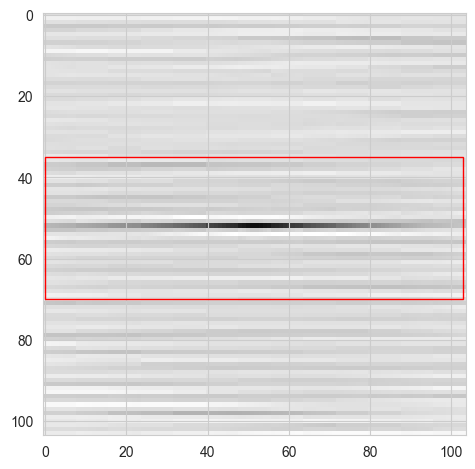

FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8.wav
FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8_15.jpg : [4.688332], [0.]


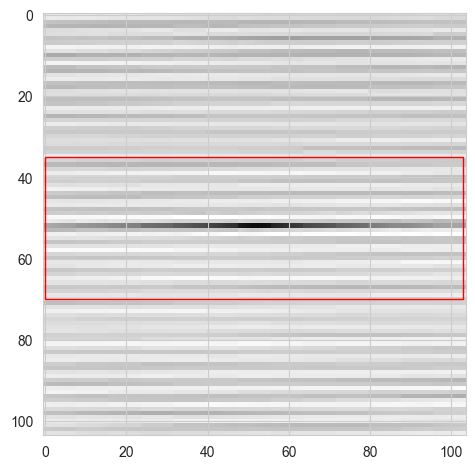

FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8.wav
FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8_24.jpg : [7.7160378], [0.]


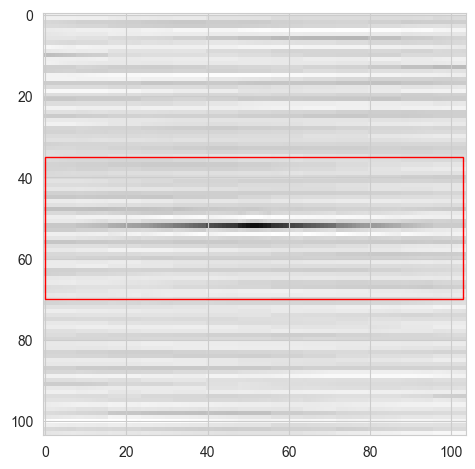

FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8.wav
FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8_26.jpg : [5.0812845], [0.]


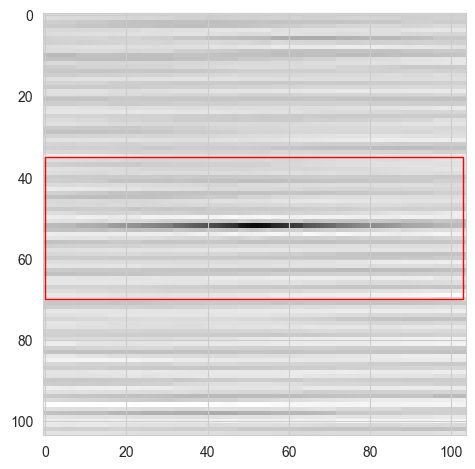

FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8.wav
FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8_30.jpg : [6.6363053], [0.]


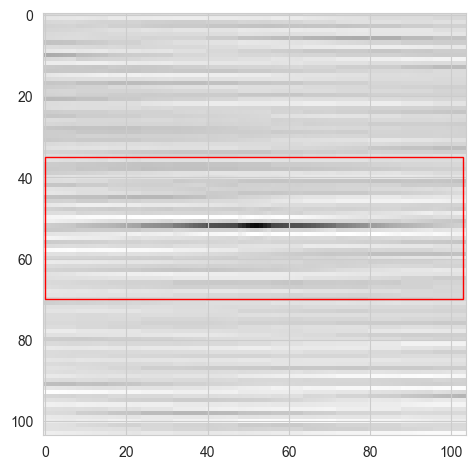

FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8.wav
FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8_31.jpg : [4.185206], [0.]


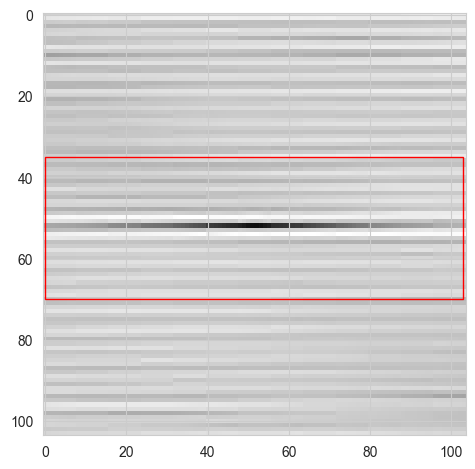

FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8.wav
FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8_32.jpg : [5.200446], [0.]


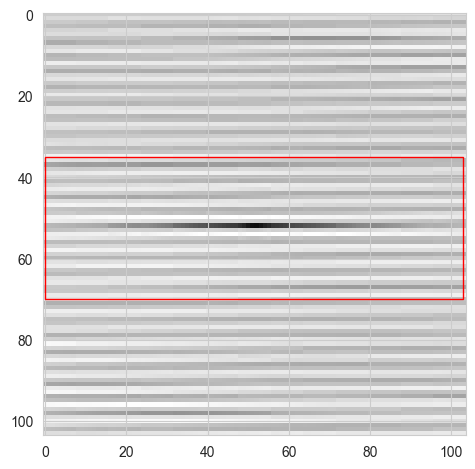

FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8.wav
FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8_39.jpg : [6.566331], [0.]


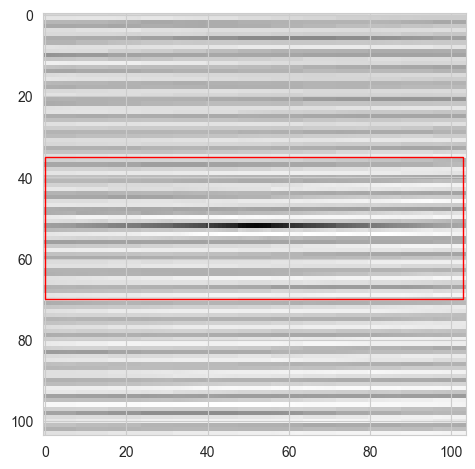

FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8.wav
FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8_46.jpg : [6.0011864], [0.]


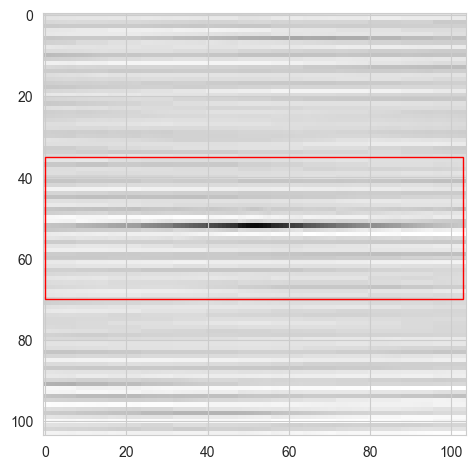

FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8.wav
FA0004_GW01_H01_0200_20211108012646_farm_mic_snd_39dbdcf44cc8_56.jpg : [6.418569], [0.]


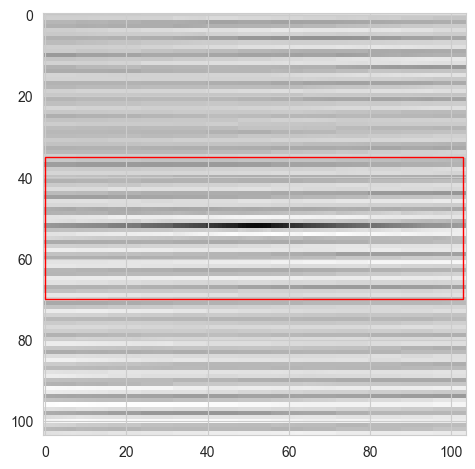

FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b.wav
FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b_04.jpg : [4.686579], [0.]


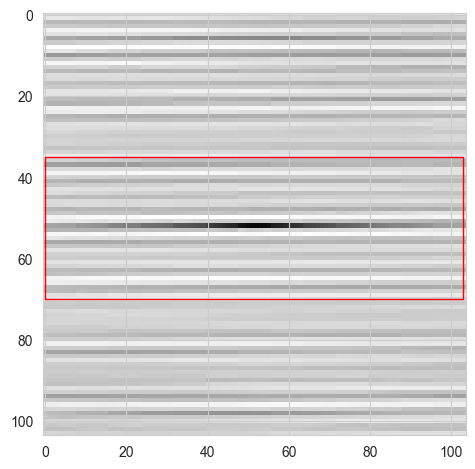

FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b.wav
FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b_12.jpg : [4.9050374], [0.]


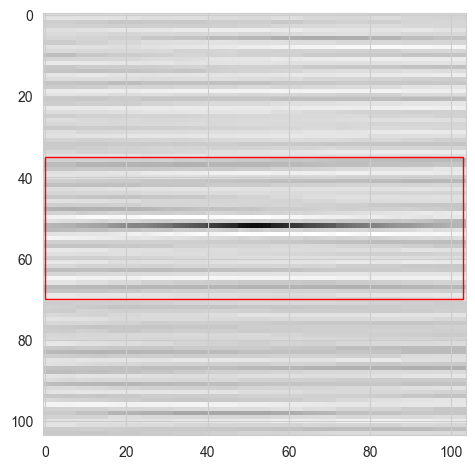

FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b.wav
FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b_21.jpg : [5.258379], [0.]


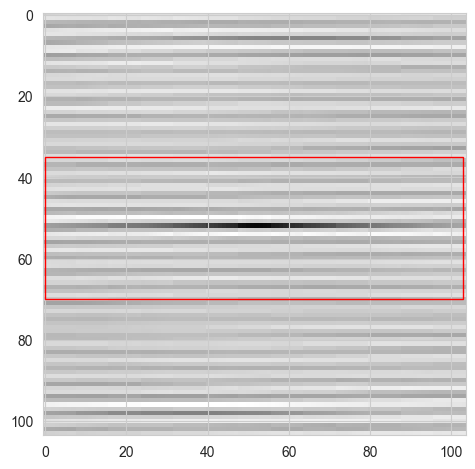

FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b.wav
FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b_43.jpg : [5.422266], [0.]


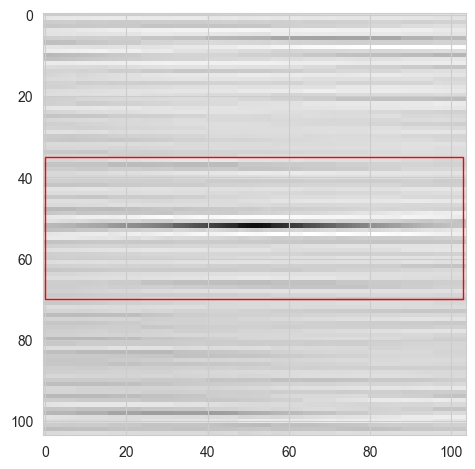

FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b.wav
FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b_45.jpg : [4.331738], [0.]


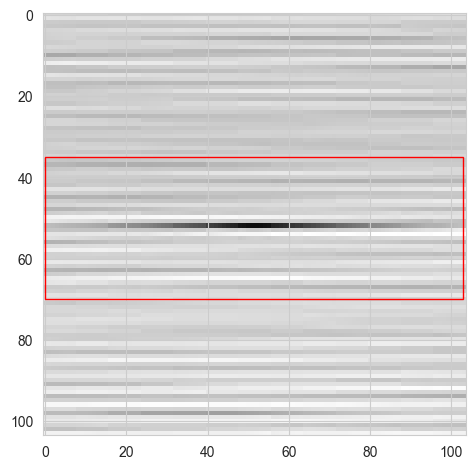

FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b.wav
FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b_48.jpg : [4.715496], [0.]


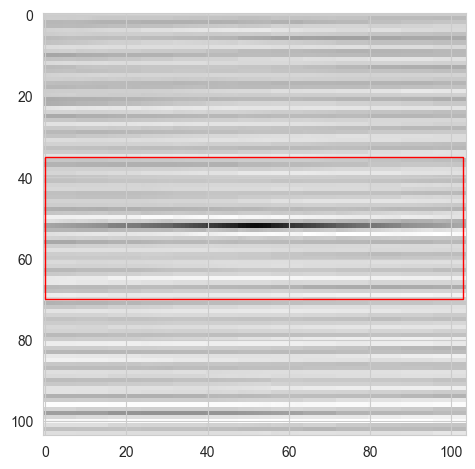

FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b.wav
FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b_50.jpg : [6.6134443], [0.]


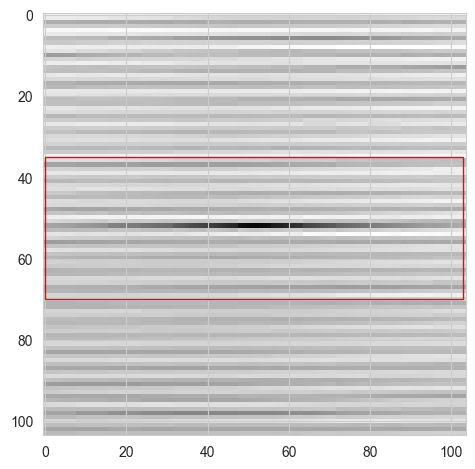

FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b.wav
FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b_52.jpg : [5.691432], [0.]


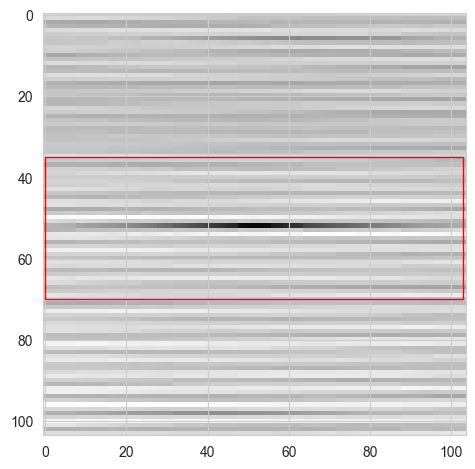

FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b.wav
FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b_55.jpg : [5.5112433], [0.]


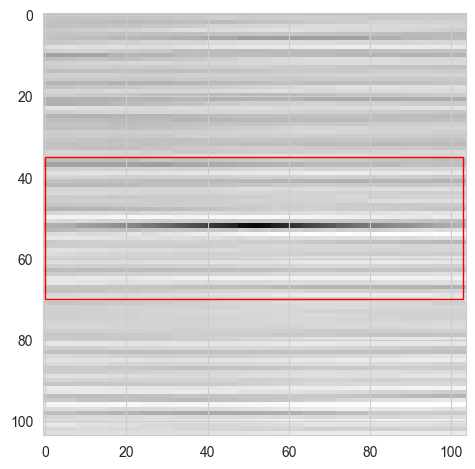

FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b.wav
FA0004_GW01_H01_0200_20211108013147_farm_mic_snd_ad3bd630429b_56.jpg : [4.8996954], [0.]


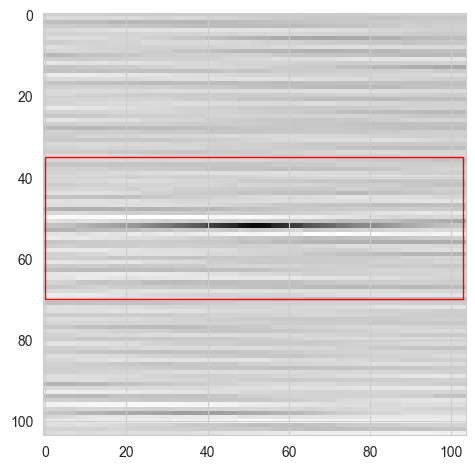

FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2.wav
FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_01.jpg : [4.3243012], [0.]


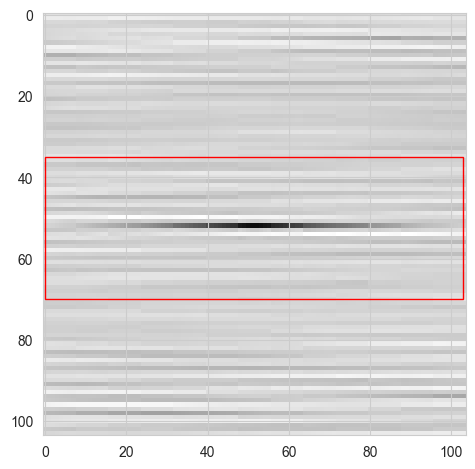

FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2.wav
FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_02.jpg : [4.4541845], [0.]


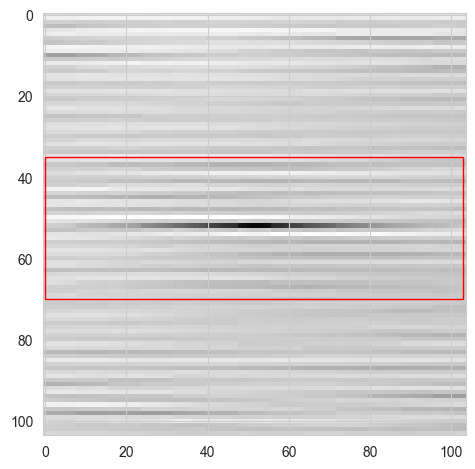

FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2.wav
FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_03.jpg : [24.580233], [0.]


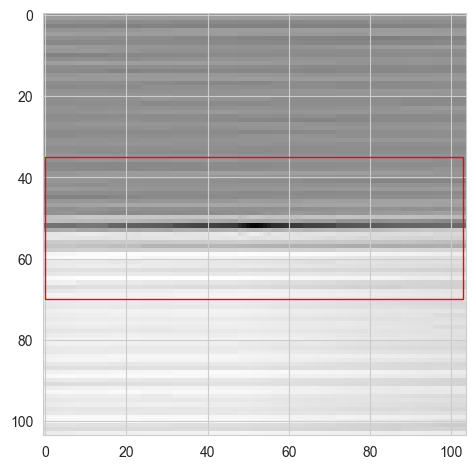

FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2.wav
FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_04.jpg : [7.4790053], [0.]


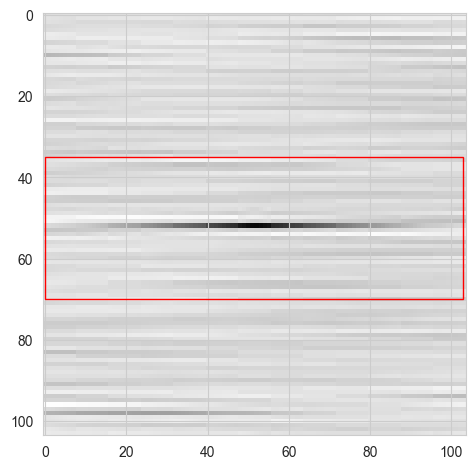

FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2.wav
FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_05.jpg : [5.509991], [0.]


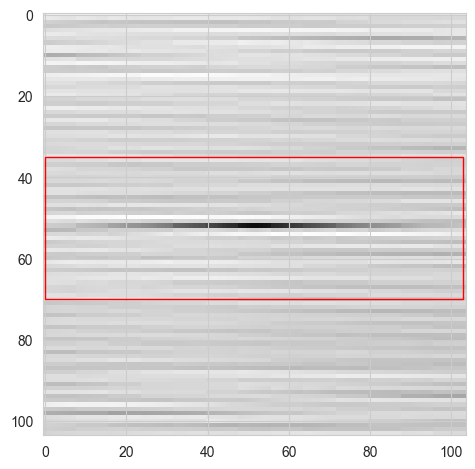

FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2.wav
FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_06.jpg : [6.262621], [0.]


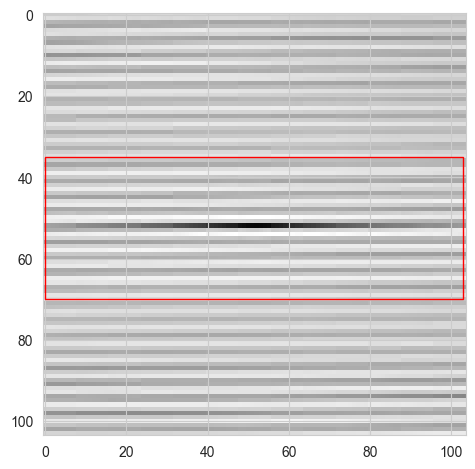

FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2.wav
FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_29.jpg : [6.7948465], [0.]


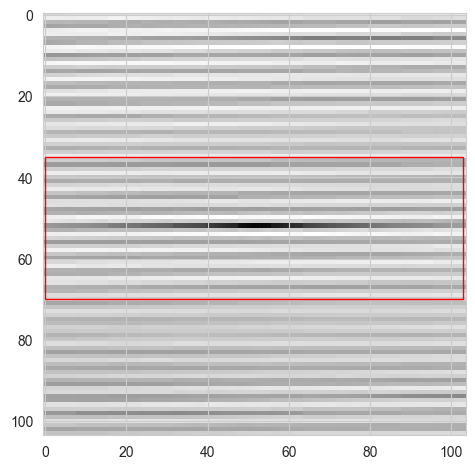

FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2.wav
FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_41.jpg : [6.664484], [0.]


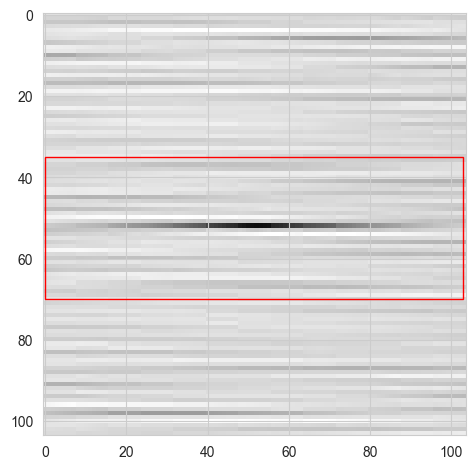

FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2.wav
FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_48.jpg : [4.447332], [0.]


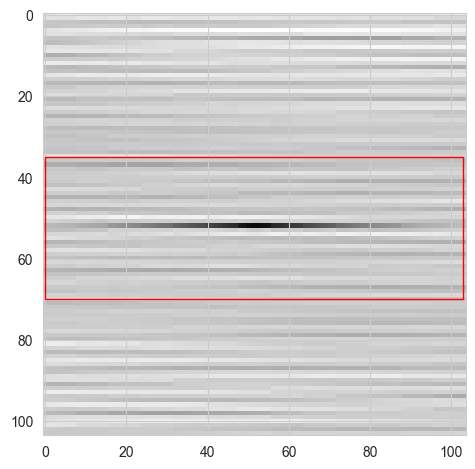

FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2.wav
FA0004_GW01_H01_0200_20211108013646_farm_mic_snd_a2fe2cea4eb2_55.jpg : [7.853967], [0.]


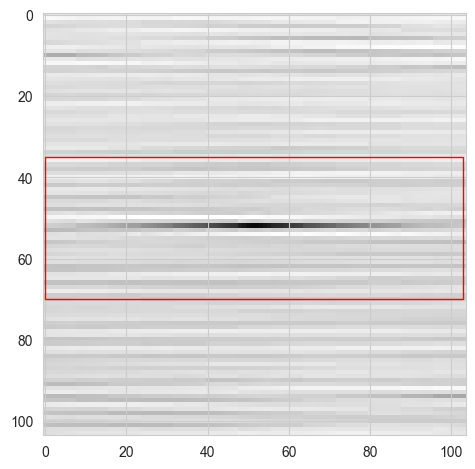

FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347.wav
FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347_05.jpg : [8.056819], [0.]


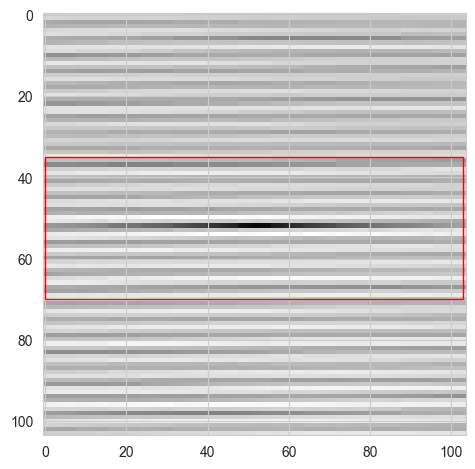

FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347.wav
FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347_07.jpg : [5.2795353], [0.]


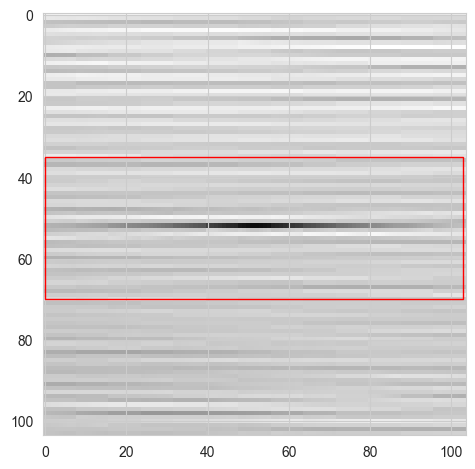

FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347.wav
FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347_10.jpg : [7.033897], [0.]


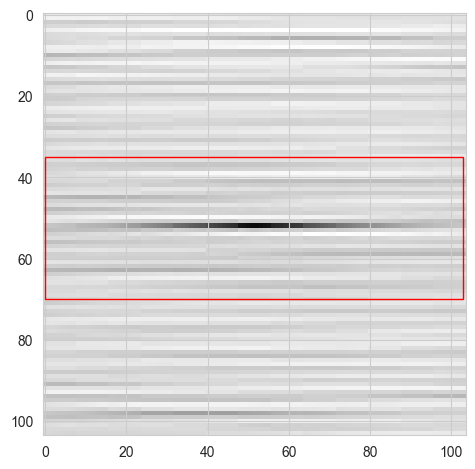

FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347.wav
FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347_11.jpg : [4.649963], [0.]


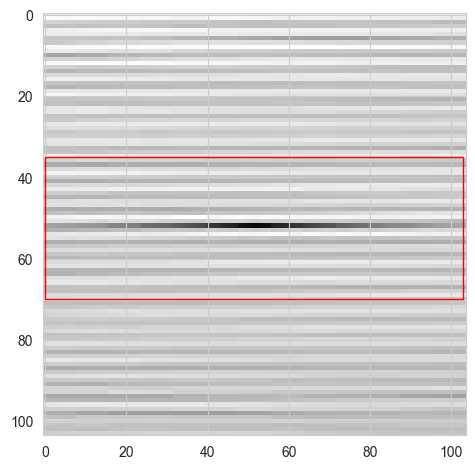

FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347.wav
FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347_26.jpg : [3.5836892], [0.]


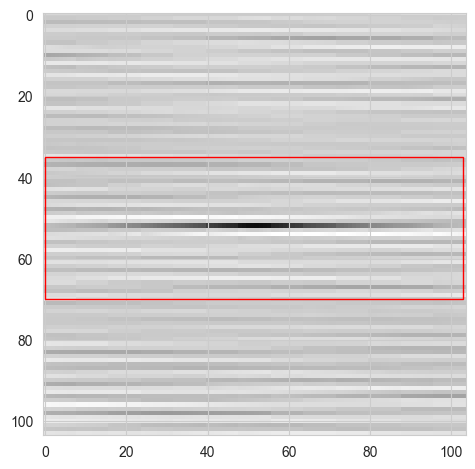

FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347.wav
FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347_28.jpg : [7.5526676], [0.]


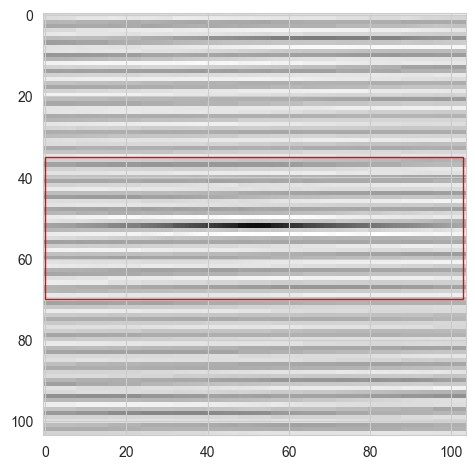

FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347.wav
FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347_29.jpg : [7.81044], [0.]


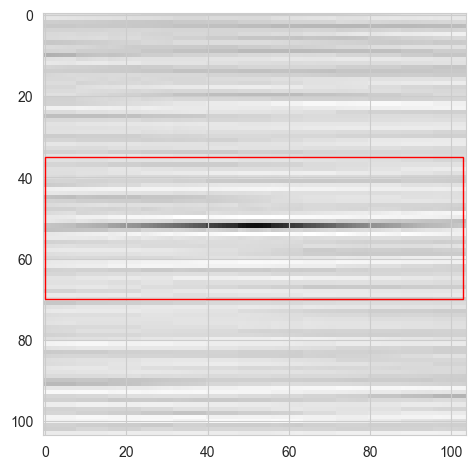

FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347.wav
FA0004_GW01_H01_0200_20211108014146_farm_mic_snd_02dbf8b34347_37.jpg : [4.807134], [0.]


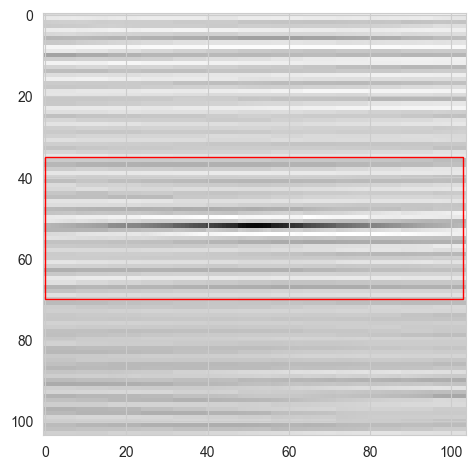

FA0004_GW01_H01_0200_20211108014645_farm_mic_snd_bfeb7d85417d.wav
FA0004_GW01_H01_0200_20211108014645_farm_mic_snd_bfeb7d85417d_07.jpg : [4.9574103], [0.]


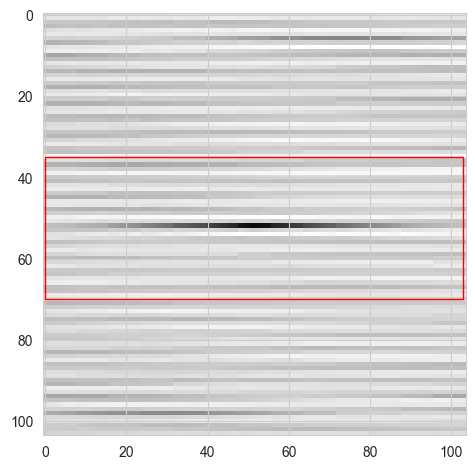

FA0004_GW01_H01_0200_20211108014645_farm_mic_snd_bfeb7d85417d.wav
FA0004_GW01_H01_0200_20211108014645_farm_mic_snd_bfeb7d85417d_09.jpg : [5.6854353], [0.]


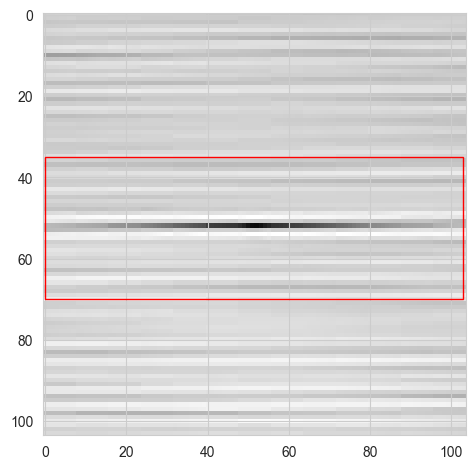

FA0004_GW01_H01_0200_20211108014645_farm_mic_snd_bfeb7d85417d.wav
FA0004_GW01_H01_0200_20211108014645_farm_mic_snd_bfeb7d85417d_15.jpg : [11.3465], [0.]


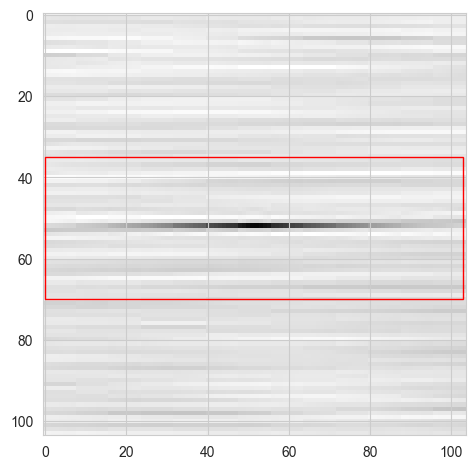

FA0004_GW01_H01_0200_20211108014645_farm_mic_snd_bfeb7d85417d.wav
FA0004_GW01_H01_0200_20211108014645_farm_mic_snd_bfeb7d85417d_22.jpg : [8.830173], [0.]


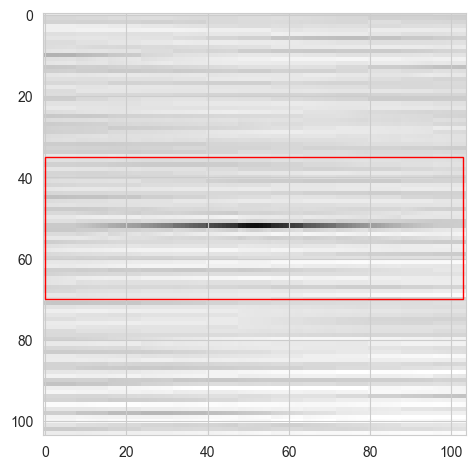

FA0004_GW01_H01_0200_20211108014645_farm_mic_snd_bfeb7d85417d.wav
FA0004_GW01_H01_0200_20211108014645_farm_mic_snd_bfeb7d85417d_24.jpg : [6.1401434], [0.]


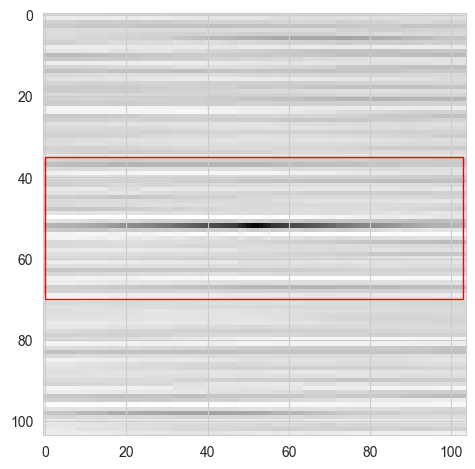

FA0004_GW01_H01_0200_20211108014645_farm_mic_snd_bfeb7d85417d.wav
FA0004_GW01_H01_0200_20211108014645_farm_mic_snd_bfeb7d85417d_30.jpg : [9.55267], [0.]


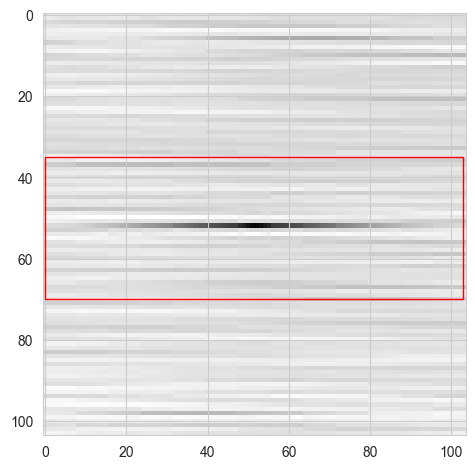

In [197]:
# tsne outlier and class normal
import matplotlib.patches as patches
filelistTsne = rawDf[(rawDf.tsneClass == 1) & ((rawDf.moduleId.str.contains('0200|0201')))]['fileName'].to_list()
len(filelistTsne)
start = 150 
end = min(start+50,len(filelistTsne))
for idx, aName in enumerate(filelistTsne) : 
    if idx < start : continue
    if idx > end : break
    moduleId = aName.split('_')[3]
    aDate = aName.split('_')[4][:8]
    if moduleId >= '0202' :
        aFileName = '../output/ilt_20211108_20211109/abnormal/' + aName
    else : 
        aFileName = '../output/ilt_20211108_20211109/normal/' + aDate + '/' + aName
    print(f"{'_'.join(aName.split('_')[:-1])+'.wav'}")
    print(f"{aName} : {rawDf[rawDf.fileName == aName]['recon_error'].values}, {rawDf[rawDf.fileName == aName]['isInfected'].values}")
    aImg = plt.imread(aFileName)
    fig, ax = plt.subplots()
    ax.imshow(aImg)
    rect = patches.Rectangle((0, 35), 103, 35, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    # plt.axis('off')
    plt.grid(visible=True)
    plt.tight_layout()
    plt.show()

#### no scaler

In [34]:
from sklearn.preprocessing import StandardScaler
X_test_results_test = list(zip(rawDf.recon_error,rawDf.t_v, rawDf.lv))
X_test_results_test = [[x[0], *x[1].flatten(),*x[2].flatten()] for x in X_test_results_test]
#X_test_results_test = [list(x[1].flatten()) for x in X_test_results_test]
# X_test_results_test

# X_test_results_test = StandardScaler().fit(X_test_results_test).transform(X_test_results_test)
X_test_results_test
len(X_test_results_test)

from sklearn.manifold import TSNE

# t-SNE 모델 생성 및 학습
tsne = TSNE(n_components=2, random_state=0, verbose=1, perplexity=100, n_iter=250)
digits_tsne_test = tsne.fit_transform(X_test_results_test)


[[85.64569854736328,
  -0.8524038,
  0.14019267,
  0.34800395,
  0.3642073,
  0.40855324,
  0.46510977,
  0.7097476,
  0.56814486,
  0.316918,
  0.55815744,
  0.64728874,
  0.34012997],
 [81.15434265136719,
  -0.85236317,
  0.13996583,
  0.3480842,
  0.3643131,
  0.27788466,
  0.36511216,
  0.42506468,
  0.5379058,
  0.34429306,
  0.46129566,
  0.3032325,
  0.44387156],
 [82.04432678222656,
  -0.85236794,
  0.13999215,
  0.34807685,
  0.36429885,
  0.56922,
  0.35463578,
  0.6267819,
  0.30983818,
  0.42533126,
  0.50775206,
  0.584127,
  0.37976047],
 [71.48514556884766,
  -0.8522888,
  0.13955297,
  0.34822354,
  0.36451226,
  0.39463955,
  0.67393446,
  0.39146224,
  0.37539956,
  0.5514769,
  0.4738825,
  0.5454048,
  0.47857848],
 [85.93861389160156,
  -0.85240895,
  0.14022088,
  0.34799436,
  0.36419368,
  0.50063163,
  0.7099569,
  0.5955185,
  0.46173003,
  0.49454555,
  0.5418659,
  0.4407194,
  0.6055664],
 [86.88172912597656,
  -0.85241306,
  0.14024371,
  0.34798616,
  0.3

116761

/Users/hansgun/.pyenv/versions/3.9.14/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hansgun/.pyenv/versions/3.9.14/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 116761 samples in 0.047s...
[t-SNE] Computed neighbors for 116761 samples in 19.325s...
[t-SNE] Computed conditional probabilities for sample 1000 / 116761
[t-SNE] Computed conditional probabilities for sample 2000 / 116761
[t-SNE] Computed conditional probabilities for sample 3000 / 116761
[t-SNE] Computed conditional probabilities for sample 4000 / 116761
[t-SNE] Computed conditional probabilities for sample 5000 / 116761
[t-SNE] Computed conditional probabilities for sample 6000 / 116761
[t-SNE] Computed conditional probabilities for sample 7000 / 116761
[t-SNE] Computed conditional probabilities for sample 8000 / 116761
[t-SNE] Computed conditional probabilities for sample 9000 / 116761
[t-SNE] Computed conditional probabilities for sample 10000 / 116761
[t-SNE] Computed conditional probabilities for sample 11000 / 116761
[t-SNE] Computed conditional probabilities for sample 12000 / 116761
[t-SNE] Computed conditional proba

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'normal')

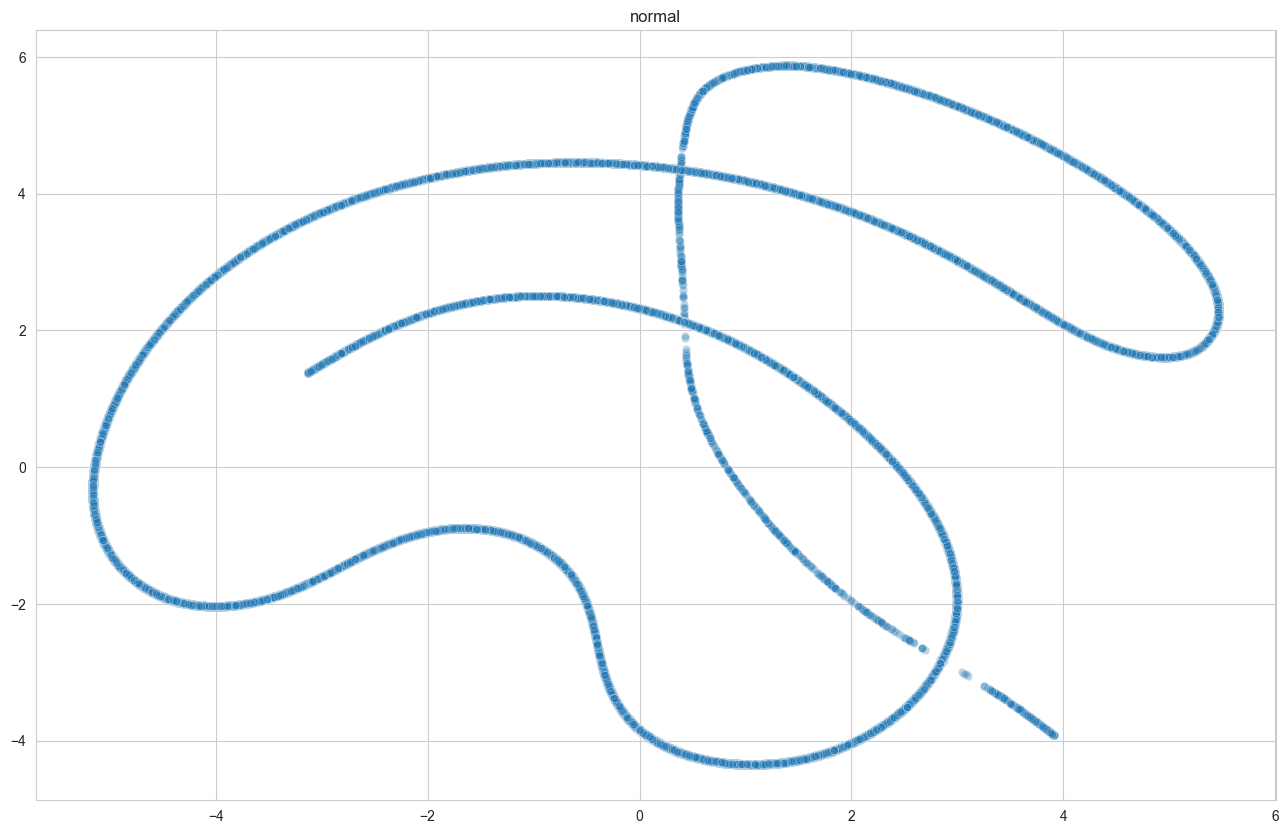

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'abnormal')

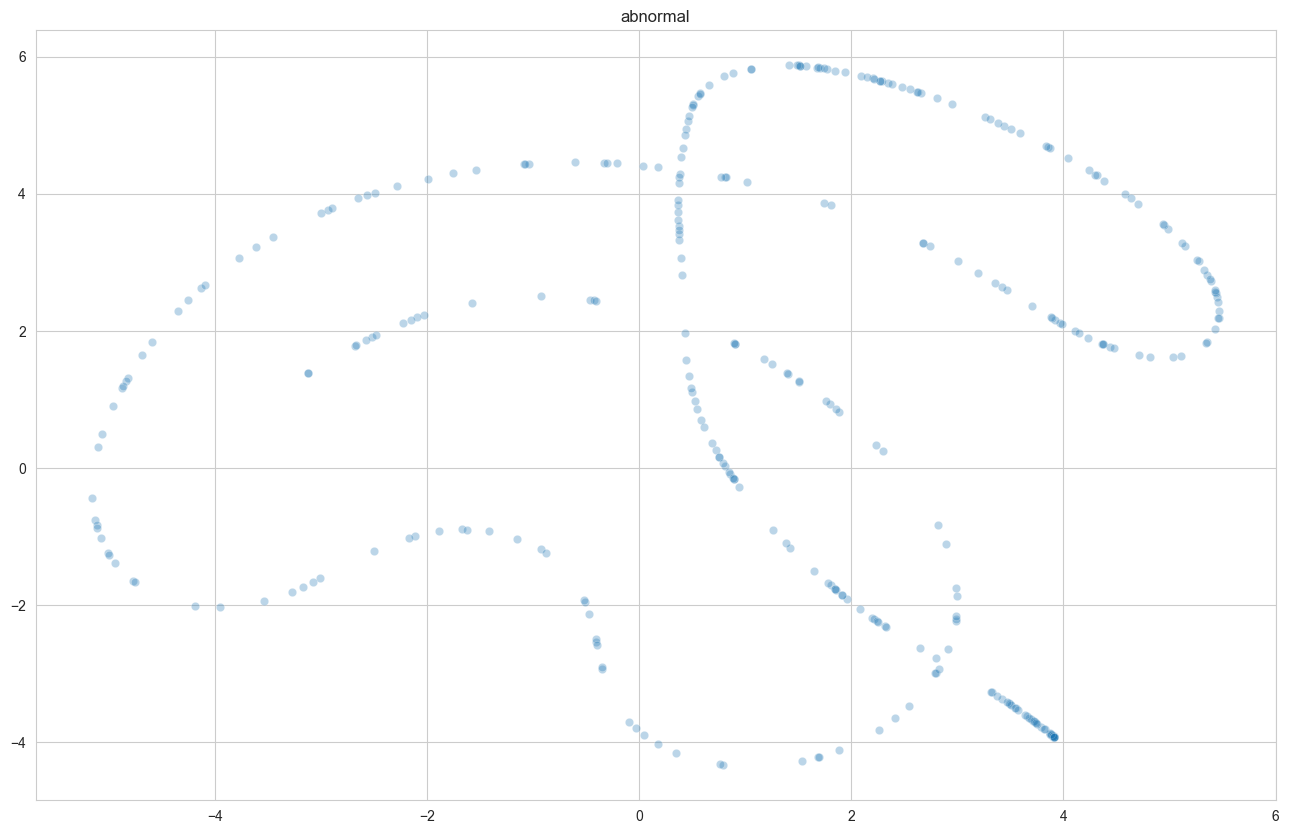

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'all')

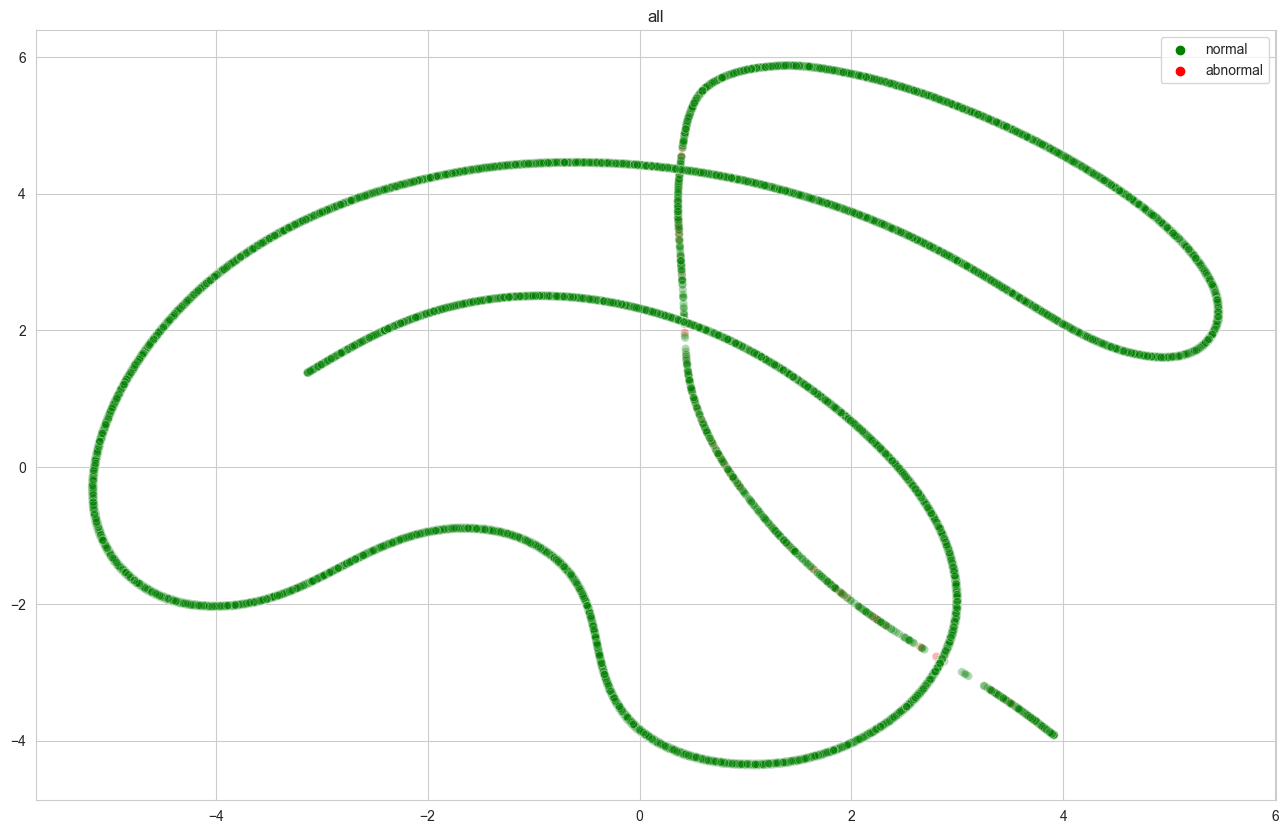

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
# circle1 = plt.Circle(xy=(0, 0), radius=53, color='red', fill=False)
ax = sns.scatterplot(
    x=digits_tsne_test[normal_index,0], y=digits_tsne_test[normal_index,1],
    # palette=sns.color_palette("hls", 2),hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)

# ax.add_patch(circle1)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("normal")
plt.show() 

plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
# circle1 = plt.Circle(xy=(0, 0), radius=53, color='red', fill=False)
ax = sns.scatterplot(
    x=digits_tsne_test[abnormal_index,0], y=digits_tsne_test[abnormal_index,1],
    # palette=sns.color_palette("hls", 2),hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)

# ax.add_patch(circle1)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("abnormal")
plt.show() 

plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
ax = sns.scatterplot(
    x=digits_tsne_test[:,0], y=digits_tsne_test[:,1],
    palette=['green','red'],hue=colors_pred_test, 
    legend="full",
    alpha=0.3
)

# ax.add_patch(circle1)
# ax.set(xlim=(-20, 30))
# ax.set(ylim=(-100, 100));
plt.title("all")
plt.show() 


